# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import warning
import warnings
warnings.filterwarnings('ignore')

# Set option max columns display
pd.set_option('max_columns', 150)
pd.set_option('max_rows', 150)

# Dataset Overview

In [3]:
# Application Dataset
app_train = pd.read_csv('application_train.csv')
app_test = pd.read_csv('application_test.csv')
prev_app = pd.read_csv('previous_application.csv')

# Bureau dataset
bureau = pd.read_csv('bureau.csv')
bureau_blc = pd.read_csv('bureau_balance.csv')

# credit card
cc_blc = pd.read_csv('credit_card_balance.csv')

# install payment
inst_pymnt = pd.read_csv('installments_payments.csv')

In [3]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [27]:
# show info
df = app_train

list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:4]])
desc_df = pd.DataFrame(data=list_item, columns='feature data_type null_num null_pct unique_num unique_sample'.split())
desc_df

,feature,data_type,null_num,null_pct,unique_num,unique_sample
0,SK_ID_CURR,int64,0,0.000000,307511,"[100002, 100003, 100004, 100006]"
1,TARGET,int64,0,0.000000,2,"[1, 0]"
2,NAME_CONTRACT_TYPE,object,0,0.000000,2,"[Cash loans, Revolving loans]"
3,CODE_GENDER,object,0,0.000000,3,"[M, F, XNA]"
4,FLAG_OWN_CAR,object,0,0.000000,2,"[N, Y]"
5,FLAG_OWN_REALTY,object,0,0.000000,2,"[Y, N]"
6,CNT_CHILDREN,int64,0,0.000000,15,"[0, 1, 2, 3]"
7,AMT_INCOME_TOTAL,float64,0,0.000000,2548,"[202500.0, 270000.0, 67500.0, 135000.0]"
8,AMT_CREDIT,float64,0,0.000000,5603,"[406597.5, 1293502.5, 135000.0, 312682.5]"
9,AMT_ANNUITY,float64,12,0.003902,13672,"[24700.5, 35698.5, 6750.0, 29686.5]"


In [28]:
# define X and Y from app_train
x = app_train.drop('TARGET', axis=1)
y = app_train['TARGET']

In [29]:
# create missing values data frame
df_null = pd.DataFrame(x.isnull().sum()/len(df)*100).reset_index().rename(columns={'index':'feature',0:'missing'})

# filter feature that only has missing value < 20%
df_null = df_null[df_null['missing'] < 20]
df_null

,feature,missing
0,SK_ID_CURR,0.000000
1,NAME_CONTRACT_TYPE,0.000000
2,CODE_GENDER,0.000000
3,FLAG_OWN_CAR,0.000000
4,FLAG_OWN_REALTY,0.000000
5,CNT_CHILDREN,0.000000
6,AMT_INCOME_TOTAL,0.000000
7,AMT_CREDIT,0.000000
8,AMT_ANNUITY,0.003902
9,AMT_GOODS_PRICE,0.090403


In [30]:
# extract columns
col = df_null['feature'].to_list()

# assign to app_train and app_test
x = x[col]
app_test = app_test[col]

In [31]:
x.shape, app_test.shape, y.shape

((307511, 71), (48744, 71), (307511,))

# Exploratory Data Analysis

In [257]:
# copy dataset
eda = x.copy()

# define numeric and category features
num = eda.select_dtypes(include='number').columns
cat = eda.select_dtypes(include='object').columns

len(num), len(cat)

(60, 11)

## Univariate Analysis

In [66]:
# Descriptive Statistic
eda[num].describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,1.000020e+05,189145.500000,278202.000000,367142.500000,4.562550e+05
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05
DAYS_REGISTRATION,307511.0,-4986.120328,3522.886321,-2.467200e+04,-7479.500000,-4504.000000,-2010.000000,0.000000e+00


In [67]:
# descriptive statistic for categorical features
eda.describe(exclude=[np.number]).T

,count,unique,top,freq
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232
CODE_GENDER,307511,3,F,202448
FLAG_OWN_CAR,307511,2,N,202924
FLAG_OWN_REALTY,307511,2,Y,213312
NAME_TYPE_SUITE,306219,7,Unaccompanied,248526
NAME_INCOME_TYPE,307511,8,Working,158774
NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391
NAME_FAMILY_STATUS,307511,6,Married,196432
NAME_HOUSING_TYPE,307511,6,House / apartment,272868
WEEKDAY_APPR_PROCESS_START,307511,7,TUESDAY,53901


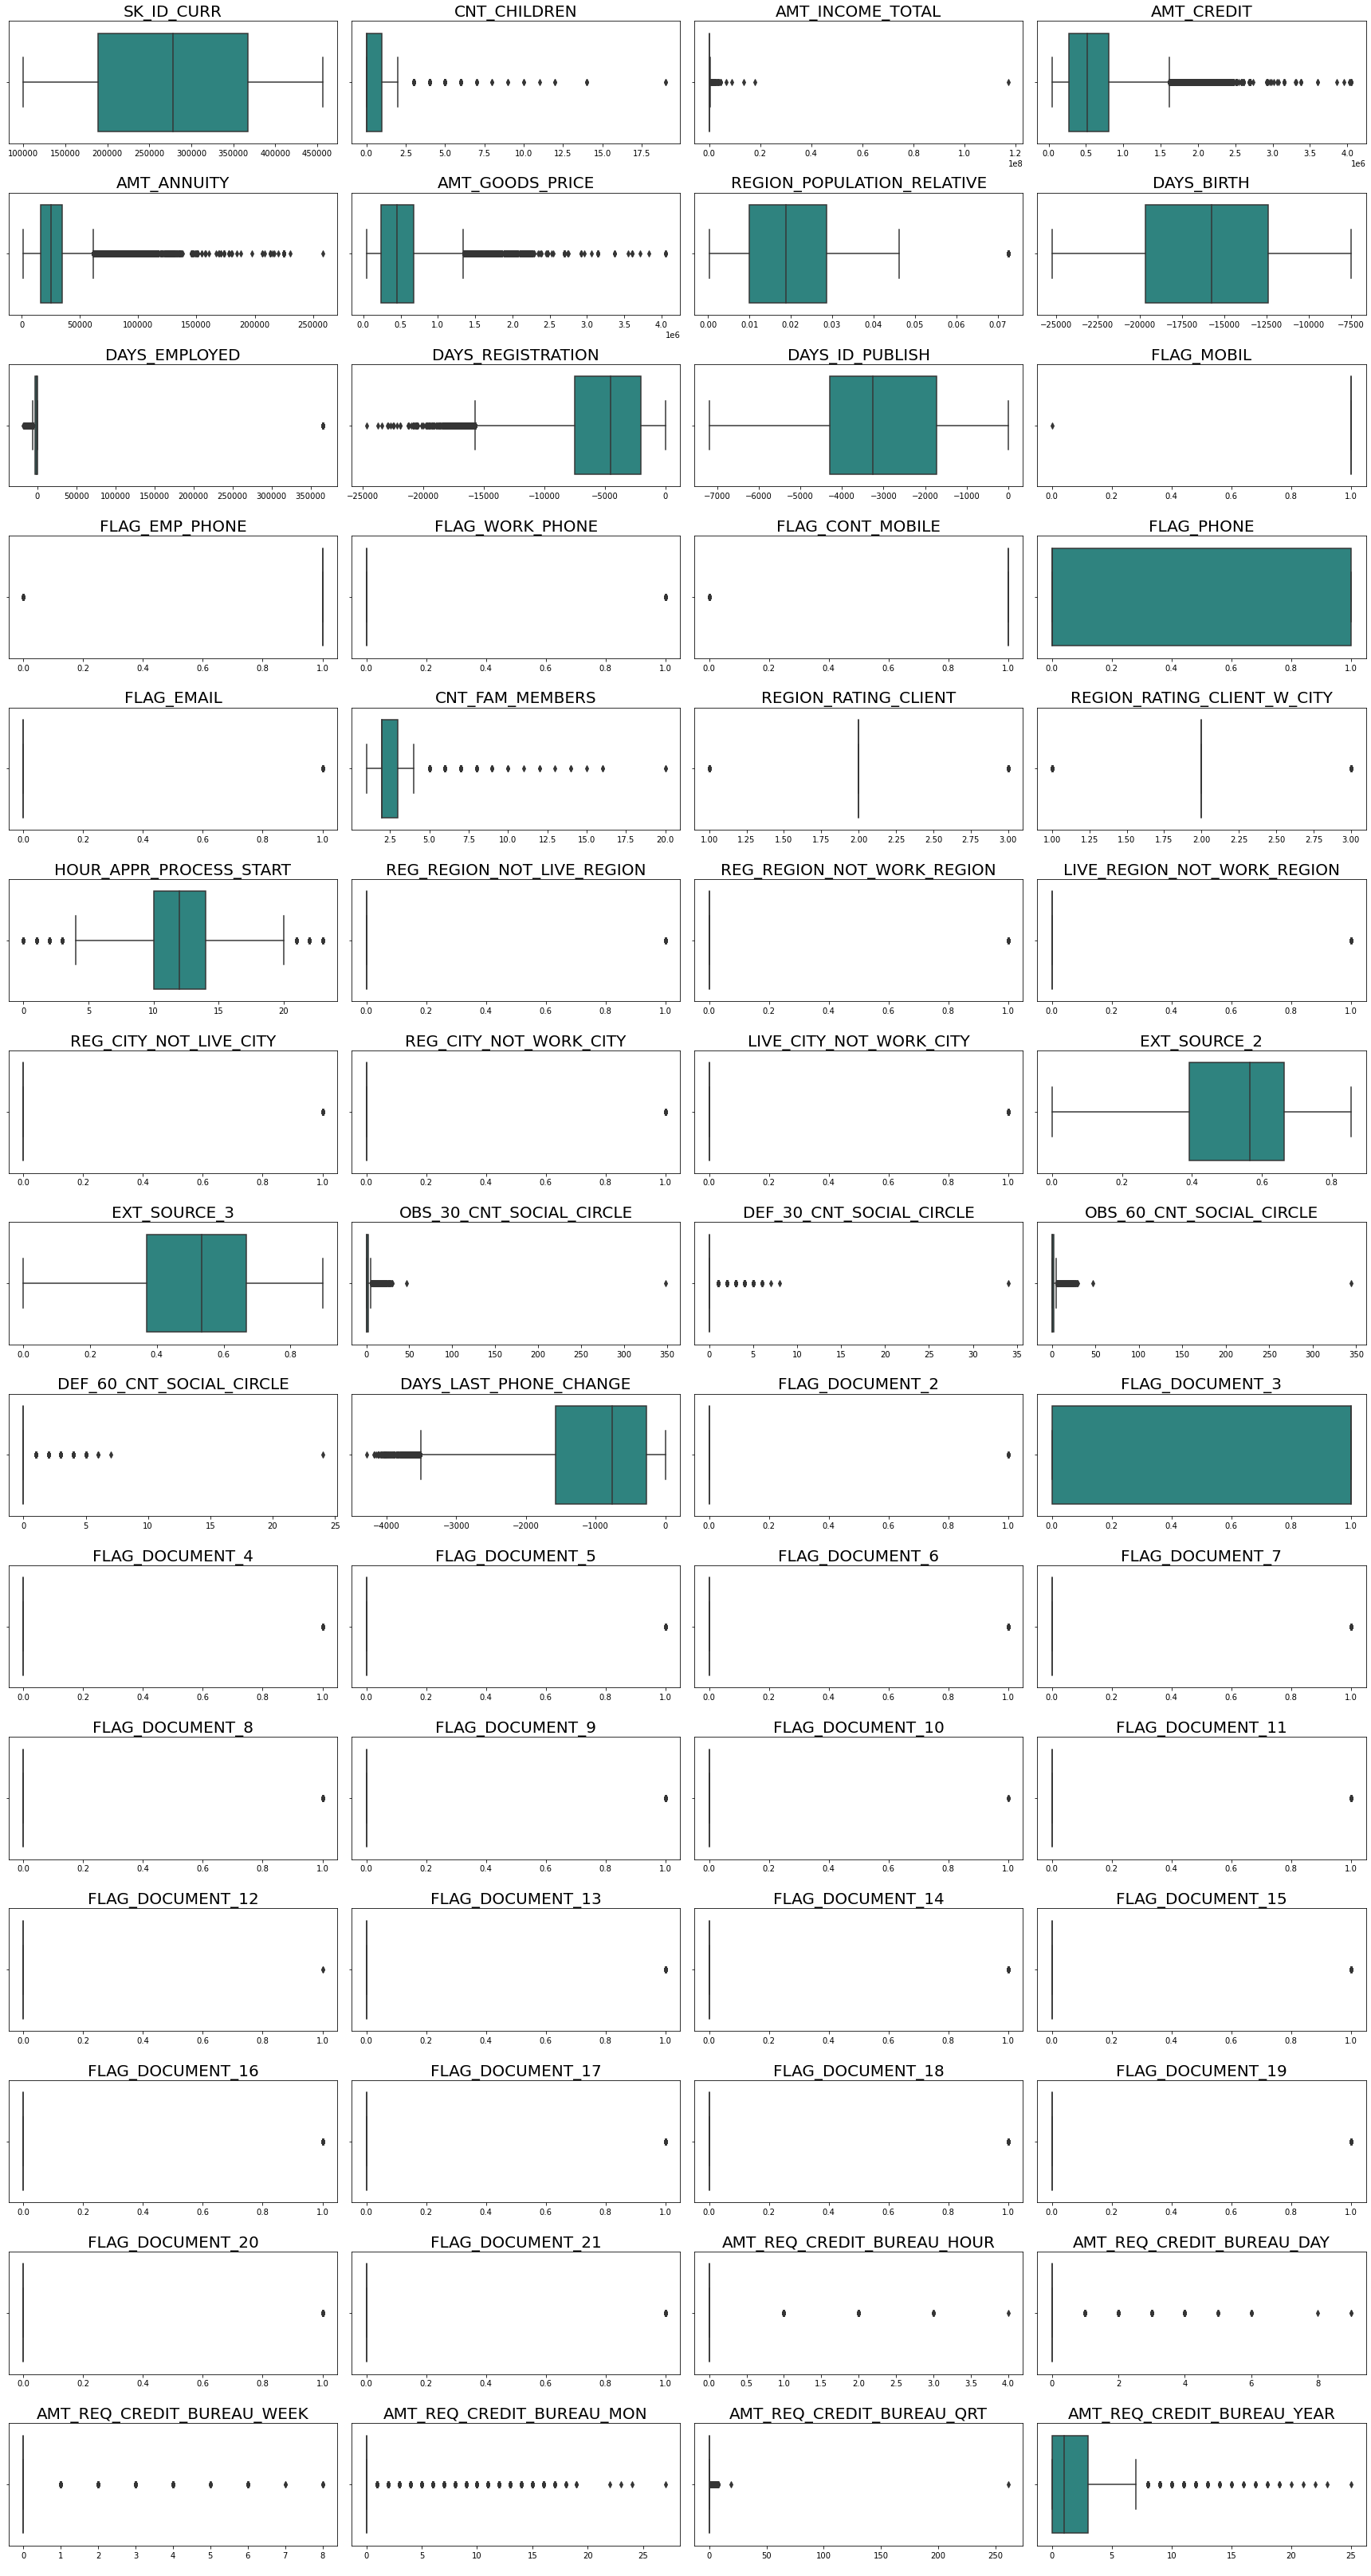

In [71]:
# numeric features analysis
plt.figure(figsize=(24,45))
for i in range(0,len(num)):
    plt.subplot(15,4,i+1)
    sns.boxplot(x=eda[num[i]], palette='viridis')
    plt.title(num[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

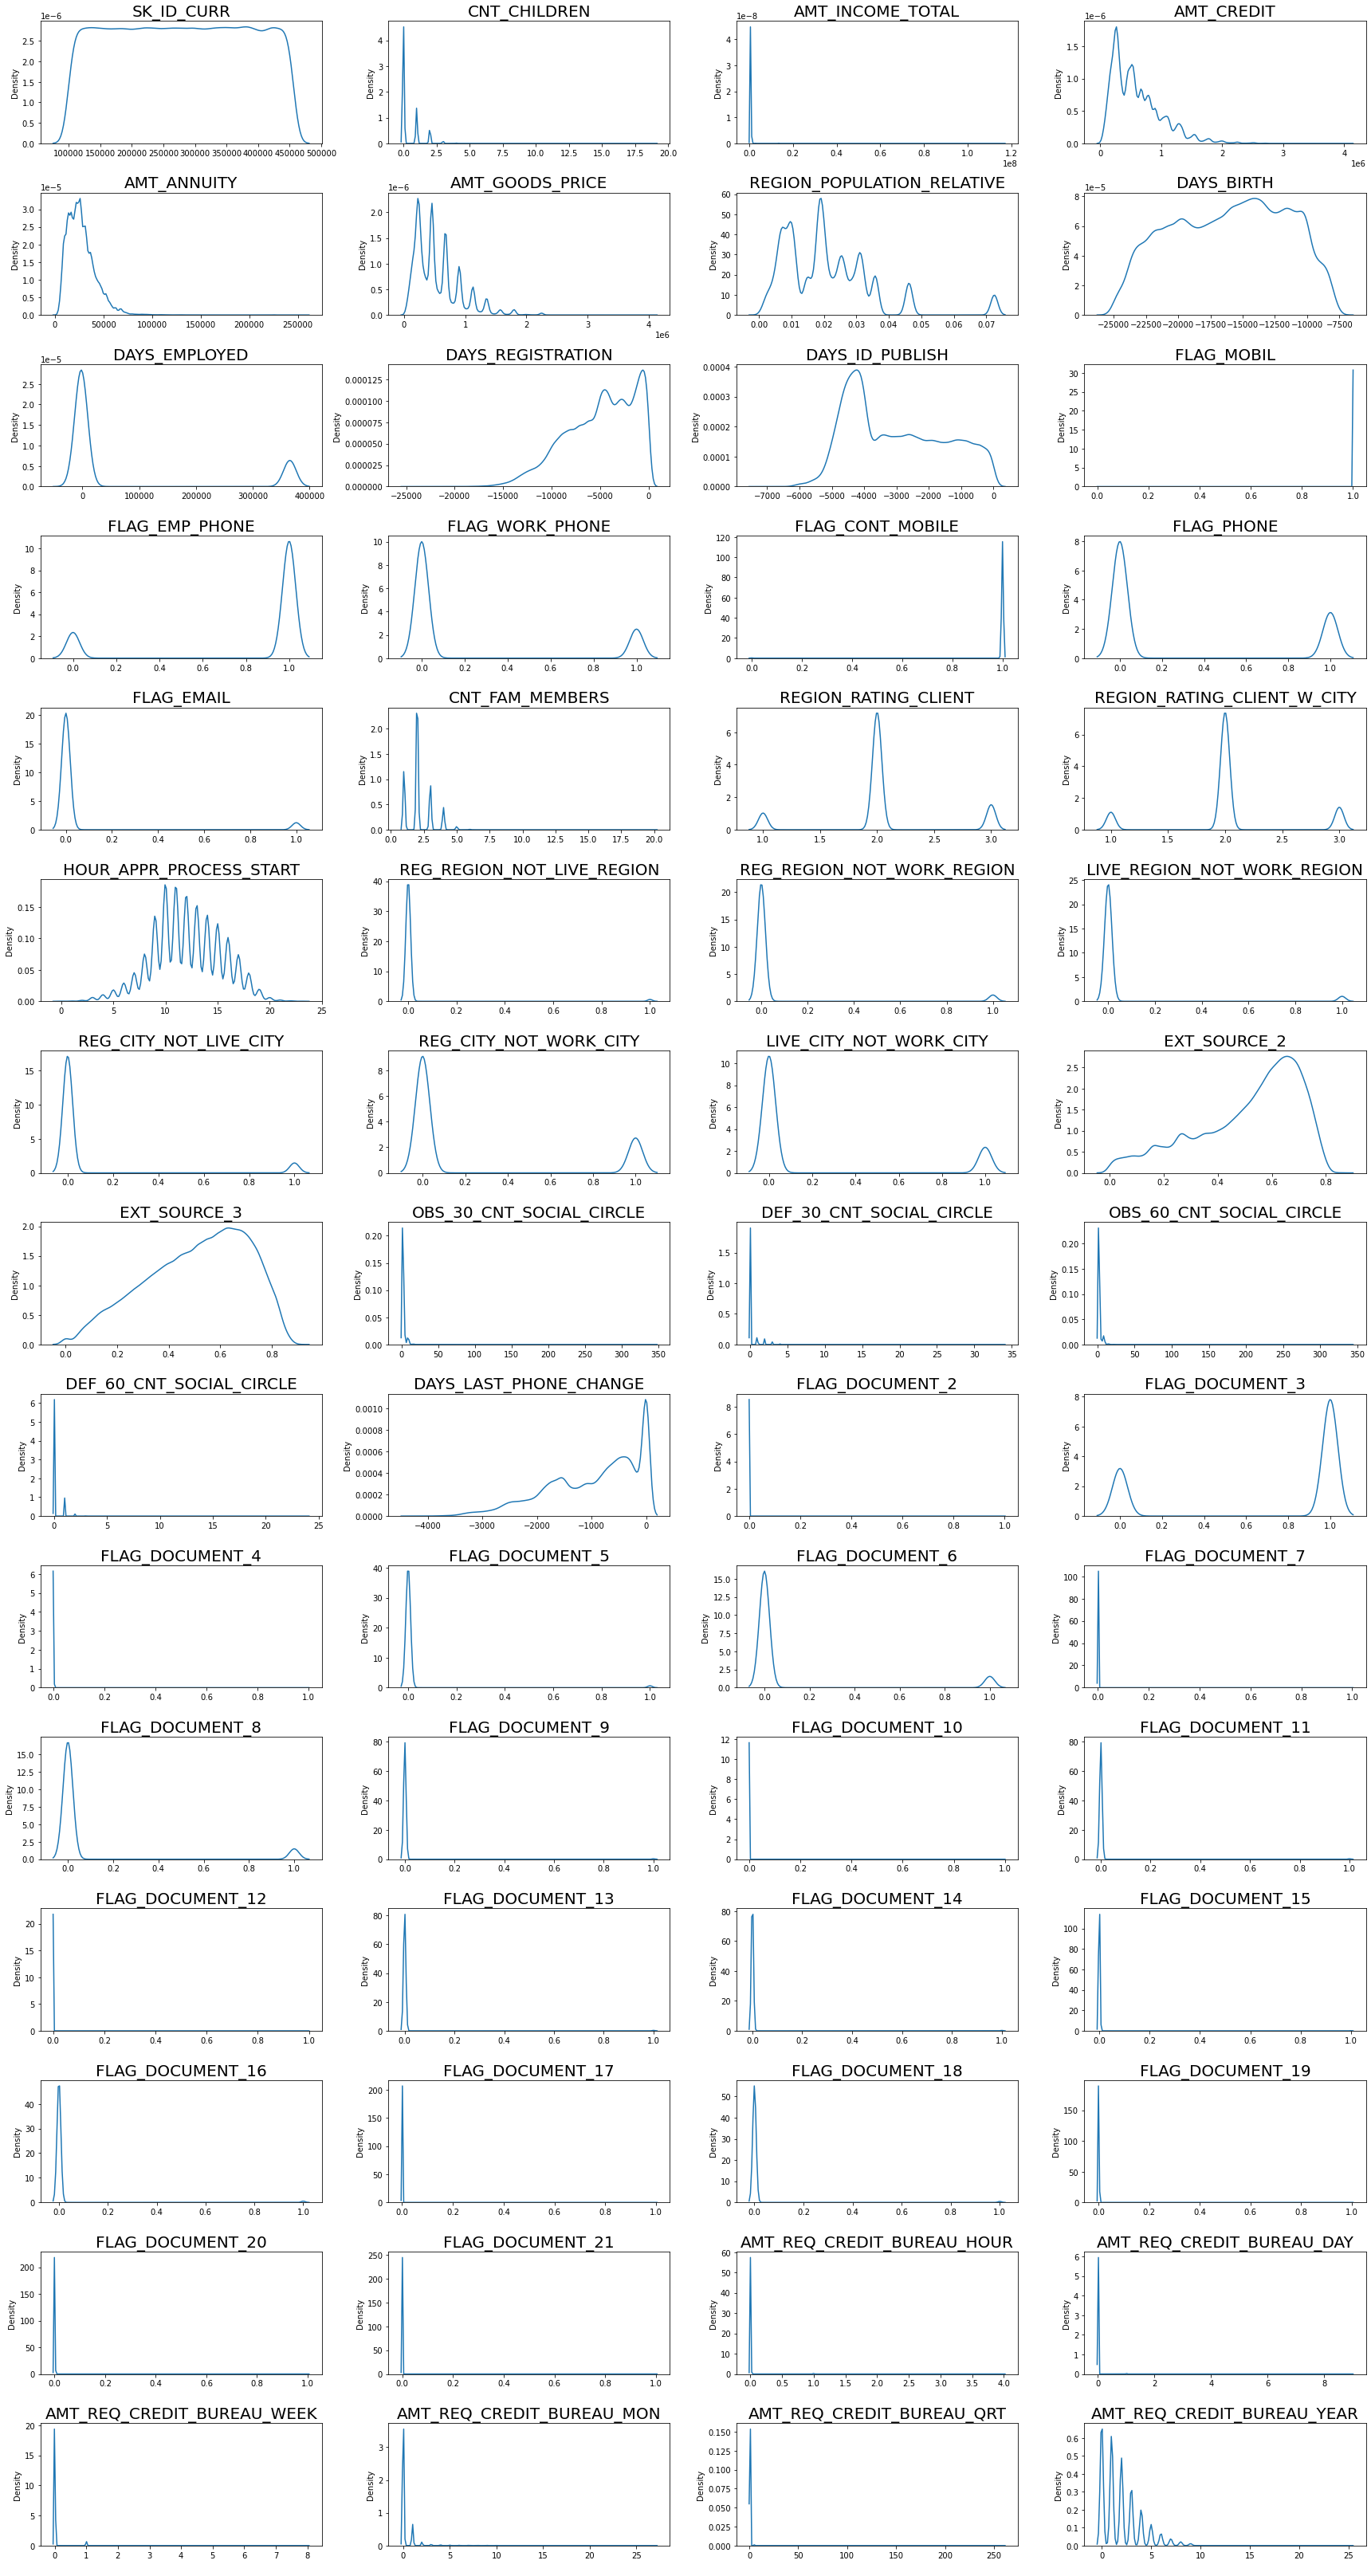

In [72]:
# numeric features analysis
plt.figure(figsize=(24,45))
for i in range(0,len(num)):
    plt.subplot(15,4,i+1)
    sns.kdeplot(x=eda[num[i]], palette='viridis')
    plt.title(num[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

## Bivariate Analysis

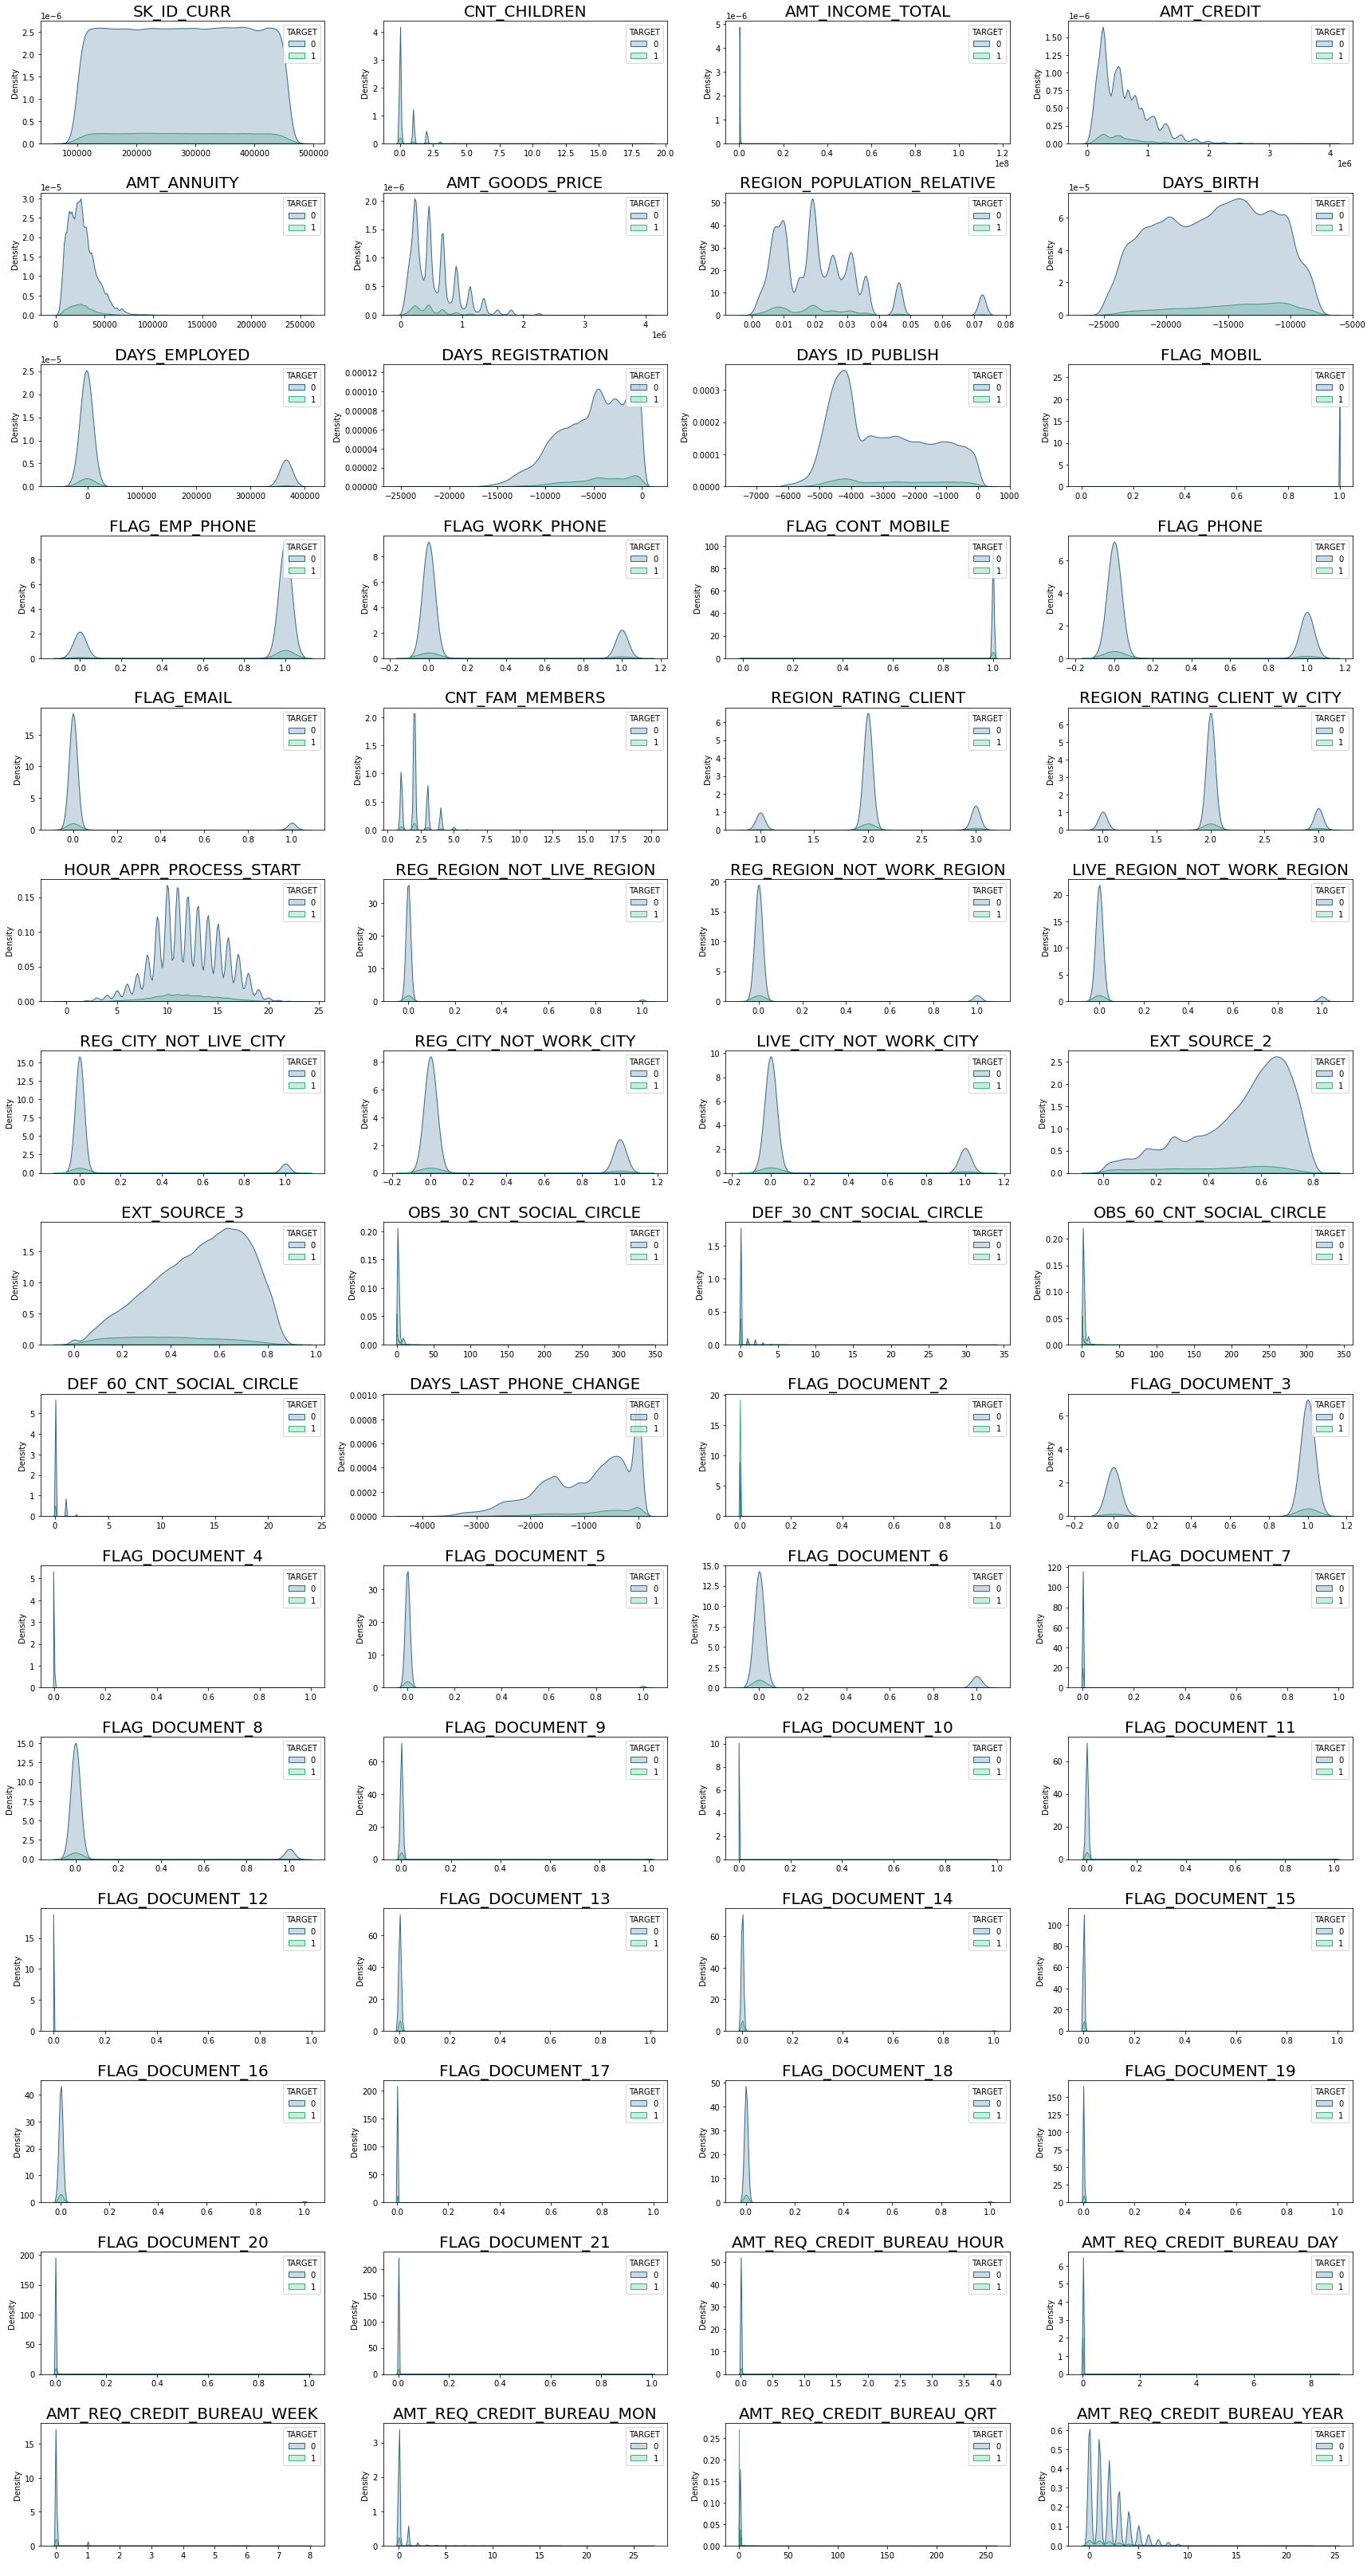

In [76]:
# concat with y
eda1 = pd.concat([eda,y], axis=1)

# plot
# numeric features analysis
plt.figure(figsize=(24,45))
for i in range(0,len(num)):
    plt.subplot(15,4,i+1)
    sns.kdeplot(x=eda1[num[i]], palette='viridis', shade=True, hue=eda1['TARGET'])
    plt.title(num[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

## Categorical Feature Analysis

In [77]:
eda[cat].nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
dtype: int64

In [81]:
cat1 = cat[:-1]
len(cat1)

10

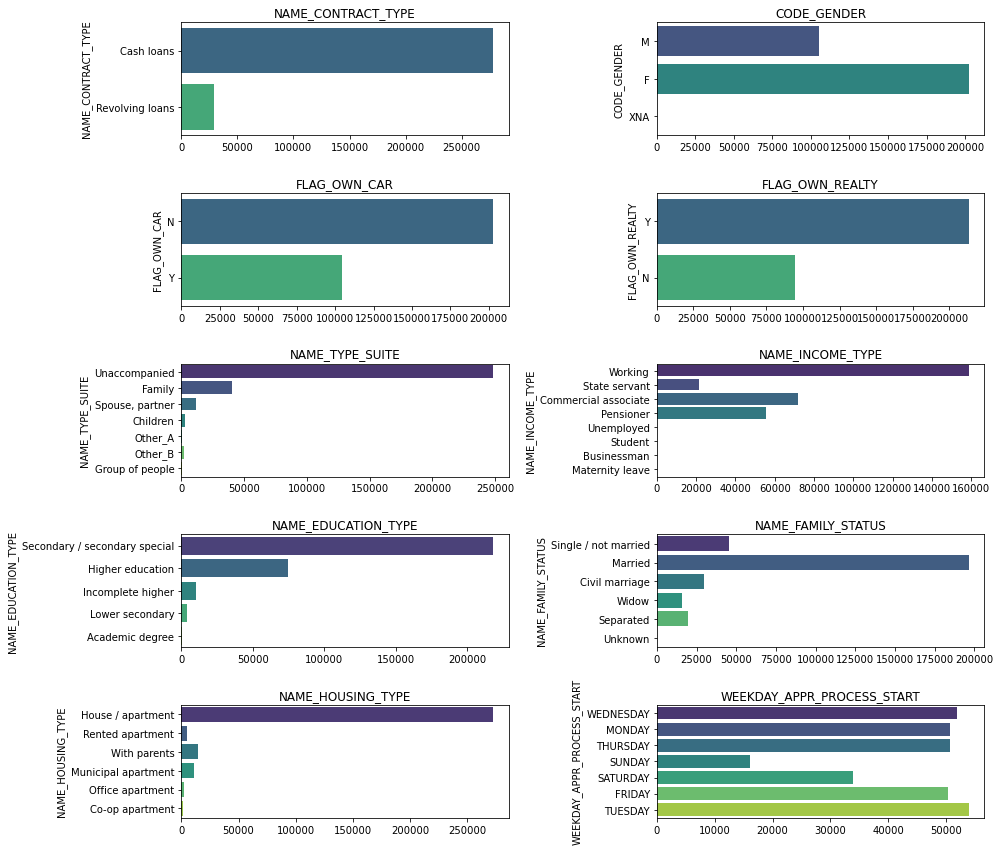

In [88]:
# categorical features analysis
plt.figure(figsize=(14,12))
for i in range(0,len(cat1)):
    plt.subplot(5,2,i+1)
    sns.countplot(y=eda[cat1[i]], palette='viridis')
    plt.title(cat1[i])
    plt.xlabel(' ')
    plt.tight_layout()

<AxesSubplot:>

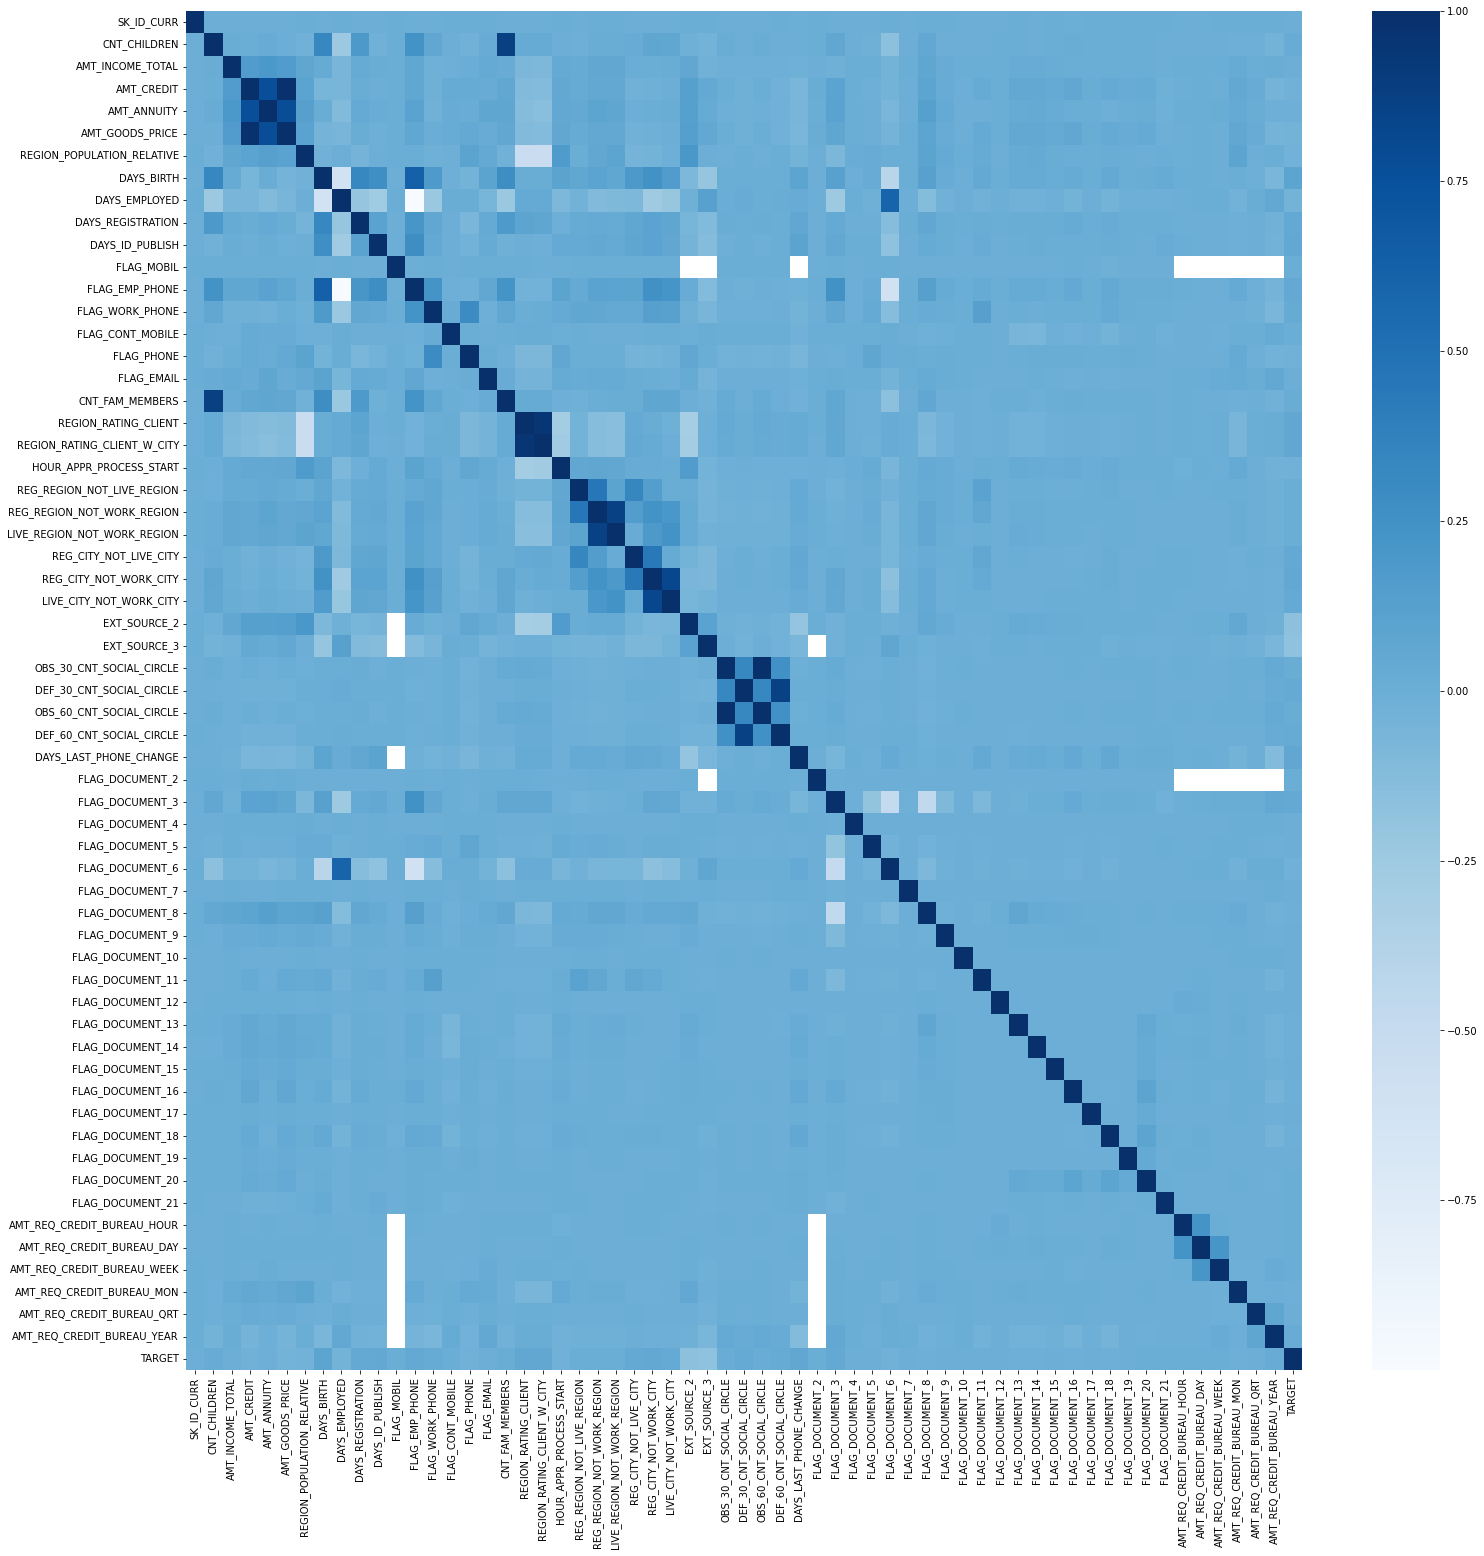

In [92]:
# heatmap
plt.figure(figsize=(25,25))
sns.heatmap(eda1.corr(), cmap='Blues', annot=False, fmt='.2f')

# Data Preprocessing

In [33]:
# make a copy data
data = x.copy()
#data = app_test.copy()

## Drop Unused Feature

In [34]:
# Drop ID and ORGANIZATION_TYPE (high cardinality)
data = data.drop(['SK_ID_CURR', 'ORGANIZATION_TYPE'], axis=1)

In [214]:
data.isnull().sum()/len(data)*100

NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.049237
AMT_GOODS_PRICE                 0.000000
NAME_TYPE_SUITE                 1.868948
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE                0.000000
FLAG_PHONE                      0.000000
FLAG_EMAIL      

## Data Cleaning

In [35]:
# fill missing values

data['AMT_ANNUITY'] = data['AMT_ANNUITY'].fillna(data['AMT_ANNUITY'].median())
data['AMT_GOODS_PRICE'] = data['AMT_GOODS_PRICE'].fillna(data['AMT_GOODS_PRICE'].median())
data['NAME_TYPE_SUITE'] = data['NAME_TYPE_SUITE'].fillna('Unaccompanied') # fill with mode
data['CNT_FAM_MEMBERS'] = data['CNT_FAM_MEMBERS'].fillna(data['CNT_FAM_MEMBERS'].median())
data['EXT_SOURCE_2'] = data['EXT_SOURCE_2'].fillna(data['EXT_SOURCE_2'].median())
data['EXT_SOURCE_3'] = data['EXT_SOURCE_3'].fillna(data['EXT_SOURCE_3'].median())
data['OBS_30_CNT_SOCIAL_CIRCLE'] = data['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(data['OBS_30_CNT_SOCIAL_CIRCLE'].median())
data['DEF_30_CNT_SOCIAL_CIRCLE'] = data['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(data['DEF_30_CNT_SOCIAL_CIRCLE'].median())
data['OBS_60_CNT_SOCIAL_CIRCLE'] = data['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(data['OBS_60_CNT_SOCIAL_CIRCLE'].median())
data['DEF_60_CNT_SOCIAL_CIRCLE'] = data['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(data['DEF_60_CNT_SOCIAL_CIRCLE'].median())
data['DAYS_LAST_PHONE_CHANGE'] = data['DAYS_LAST_PHONE_CHANGE'].fillna(data['DAYS_LAST_PHONE_CHANGE'].median())
data['AMT_REQ_CREDIT_BUREAU_HOUR'] = data['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(data['AMT_REQ_CREDIT_BUREAU_HOUR'].median())
data['AMT_REQ_CREDIT_BUREAU_DAY'] = data['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(data['AMT_REQ_CREDIT_BUREAU_DAY'].median())
data['AMT_REQ_CREDIT_BUREAU_WEEK'] = data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(data['AMT_REQ_CREDIT_BUREAU_WEEK'].median())
data['AMT_REQ_CREDIT_BUREAU_MON'] = data['AMT_REQ_CREDIT_BUREAU_MON'].fillna(data['AMT_REQ_CREDIT_BUREAU_MON'].median())
data['AMT_REQ_CREDIT_BUREAU_QRT'] = data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(data['AMT_REQ_CREDIT_BUREAU_QRT'].median())
data['AMT_REQ_CREDIT_BUREAU_YEAR'] = data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(data['AMT_REQ_CREDIT_BUREAU_YEAR'].median())

# replace very non dominant values in categorical feature with dominan values
data['NAME_INCOME_TYPE'] = np.where(data['NAME_INCOME_TYPE'] == 'Maternity leave', 'Working', data['NAME_INCOME_TYPE'])
data['NAME_FAMILY_STATUS'] = np.where(data['NAME_FAMILY_STATUS'] == 'Unknown', 'Married', data['NAME_FAMILY_STATUS'])

In [216]:
data.isnull().sum()

NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION

## Feature Engineering

In [36]:
# convert to year
data['AGE'] = round((data['DAYS_BIRTH']/365).abs(),0).astype(int)
data['YEAR_EMP'] = round((data['DAYS_EMPLOYED']/365).abs(),0).astype(int)
data['YEAR_REGISTERED'] = round((data['DAYS_REGISTRATION']/365).abs(),0).astype(int)
data['YEAR_PUBLISHED'] = round((data['DAYS_ID_PUBLISH']/365).abs(),0).astype(int)
data['YEAR_LAST_PHONE_CHANGE'] = round((data['DAYS_LAST_PHONE_CHANGE']/365).abs(),0).astype(int)

# drop original features
data = data.drop(['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE'], axis=1)

## Feature Encoding

In [37]:
# Label encoding
data['CODE_GENDER'] = data['CODE_GENDER'].map({'F':0, 'M':1,'XNA':0})
data['FLAG_OWN_CAR'] = data['FLAG_OWN_CAR'].map({'N':0, 'Y':1})
data['FLAG_OWN_REALTY'] = data['FLAG_OWN_REALTY'].map({'N':0, 'Y':1})

## Feature Selection

In [38]:
data2 = pd.concat([data, y], axis=1)
data3 = data2.copy()

In [47]:
cat = data.select_dtypes(include='object').columns
num = data.select_dtypes(include='number').columns
num

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG

In [23]:
# Automate the Code to find Woe and IV

def woe(df, feature_name):
    # make probability analysis
    feature_name = df.groupby(feature_name).agg(num_observation=('TARGET','count'),
                                                good_loan_prob=('TARGET','mean')).reset_index()
    
    # find grade proportion
    feature_name['grade_proportion'] = feature_name['num_observation']/feature_name['num_observation'].sum()
    
    # find number of good loan
    feature_name['num_good_loan'] = feature_name['grade_proportion'] * feature_name['num_observation']

    # find number of bad loan
    feature_name['num_bad_loan'] = (1-feature_name['grade_proportion']) * feature_name['num_observation']

    # find good loan proportion
    feature_name['good_loan_prop'] = feature_name['num_good_loan'] / feature_name['num_good_loan'].sum()

    # find bad loan proportion
    feature_name['bad_loan_prop'] = feature_name['num_bad_loan'] / feature_name['num_bad_loan'].sum()

    # find Weight of Evidence
    feature_name['weight_of_evidence'] = np.log(feature_name['good_loan_prop'] / feature_name['bad_loan_prop'])

    # sort values by weight of evidence
    feature_name = feature_name.sort_values('weight_of_evidence').reset_index(drop=True)
    
    # find difference each good loan proportion
    feature_name['good_loan_prop_diff'] = feature_name['good_loan_prop'].diff().abs()

    # find difference each weight of evidence
    feature_name['diff_woe'] = feature_name['weight_of_evidence'].diff().abs()
    
    # find information value
    feature_name['information_value'] = (feature_name['good_loan_prop']-feature_name['bad_loan_prop']) * feature_name['weight_of_evidence']
    feature_name['information_value'] = feature_name['information_value'].sum()
    
    return feature_name

In [26]:
# build plot function
def plot_woe(df, xlabel_rotation=0):
    plt.figure(figsize=(8,4))
    sns.pointplot(x=df.columns[0], y='weight_of_evidence', data=df, marker='o', linestyle='--', color='blue')
    plt.title(str('Weight of Evidence by ' + df.columns[0]))
    plt.xticks(rotation = xlabel_rotation)

## Category

### WoE: `NAME_CONTRACT_TYPE`

In [112]:
woe(data2, 'NAME_CONTRACT_TYPE')

,NAME_CONTRACT_TYPE,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,Revolving loans,29279,0.054783,0.095213,2787.737157,26491.262843,0.010953,0.5,-3.821035,NaN,NaN,2.202264
1,Cash loans,278232,0.083459,0.904787,251740.737157,26491.262843,0.989047,0.5,0.682134,0.978095,4.50317,2.202264


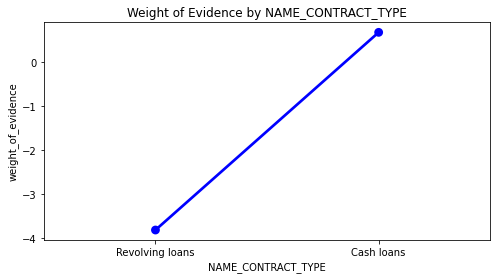

In [114]:
# plot
plot_woe(woe(data2, 'NAME_CONTRACT_TYPE'))

### WoE: `NAME_TYPE_SUITE`

In [115]:
woe(data2, 'NAME_TYPE_SUITE')

,NAME_TYPE_SUITE,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,Group of people,271,0.084871,0.000881,0.238824,270.761176,0.000001,0.002739,-7.780341,NaN,NaN,2.016441
1,Other_A,866,0.087760,0.002816,2.438794,863.561206,0.000012,0.008736,-6.616636,0.000011,1.163705,2.016441
2,Other_B,1770,0.098305,0.005756,10.187928,1759.812072,0.000049,0.017802,-5.898834,0.000037,0.717802,2.016441
3,Children,3267,0.073768,0.010624,34.708641,3232.291359,0.000166,0.032698,-5.281033,0.000118,0.617801,2.016441
4,"Spouse, partner",11370,0.078716,0.036974,420.397644,10949.602356,0.002015,0.110767,-4.006932,0.001848,1.274100,2.016441
5,Family,40149,0.074946,0.130561,5241.900943,34907.099057,0.025122,0.353124,-2.643081,0.023107,1.363851,2.016441
6,Unaccompanied,249818,0.081687,0.812387,202948.945319,46869.054681,0.972635,0.474133,0.718522,0.947513,3.361603,2.016441


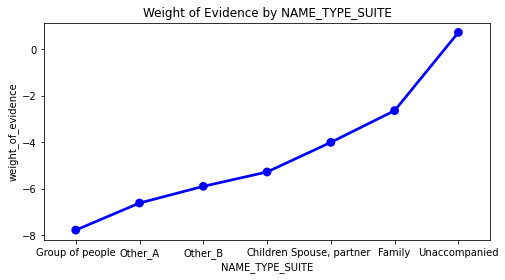

In [116]:
plot_woe(woe(data2, 'NAME_TYPE_SUITE'))

### WoE: `NAME_INCOME_TYPE`

In [118]:
woe(data2, 'NAME_INCOME_TYPE')

,NAME_INCOME_TYPE,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,Businessman,10,0.000000,0.000033,0.000325,9.999675,2.951965e-09,0.000051,-9.750614,NaN,NaN,0.616257
1,Student,18,0.000000,0.000059,0.001054,17.998946,9.564367e-09,0.000091,-9.162801,6.612402e-09,0.587813,0.616257
2,Unemployed,22,0.363636,0.000072,0.001574,21.998426,1.428751e-08,0.000111,-8.962117,4.723144e-09,0.200684,0.616257
3,State servant,21703,0.057550,0.070576,1531.718244,20171.281756,1.390435e-02,0.102211,-1.994835,1.390434e-02,6.967282,0.616257
4,Pensioner,55362,0.053864,0.180033,9966.963926,45395.036074,9.047629e-02,0.230023,-0.933092,7.657194e-02,1.061743,0.616257
5,Commercial associate,71617,0.074843,0.232892,16679.060876,54937.939124,1.514061e-01,0.278378,-0.609015,6.092985e-02,0.324077,0.616257
6,Working,158779,0.095894,0.516336,81983.313901,76795.686099,7.442132e-01,0.389135,0.648402,5.928071e-01,1.257417,0.616257


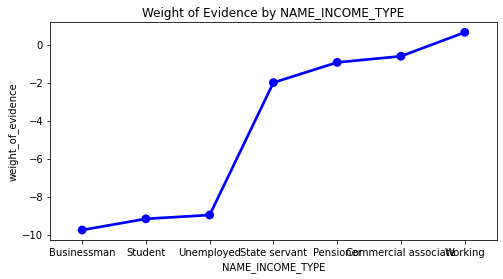

In [121]:
plot_woe(woe(data2, 'NAME_INCOME_TYPE'))

### WoE: `NAME_EDUCATION_TYPE`

In [124]:
woe(data2, 'NAME_EDUCATION_TYPE')

,NAME_EDUCATION_TYPE,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,Academic degree,164,0.018293,0.000533,0.087464,163.912536,5.034884e-07,0.001225,-7.796967,NaN,NaN,1.111746
1,Lower secondary,3816,0.109277,0.012409,47.353935,3768.646065,2.725954e-04,0.028167,-4.637922,0.000272,3.159045,1.111746
2,Incomplete higher,10277,0.084850,0.033420,343.456751,9933.543249,1.977127e-03,0.074244,-3.625712,0.001705,1.012210,1.111746
3,Higher education,74863,0.053551,0.243448,18225.262735,56637.737265,1.049147e-01,0.423314,-1.394968,0.102938,2.230745,1.111746
4,Secondary / secondary special,218391,0.089399,0.710189,155098.935911,63292.064089,8.928351e-01,0.473049,0.635202,0.787920,2.030170,1.111746


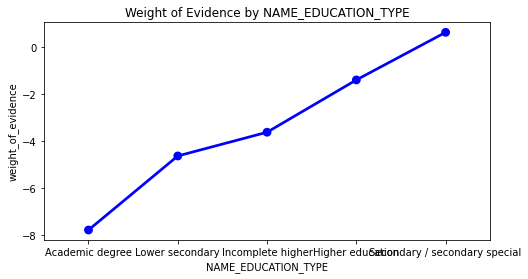

In [125]:
plot_woe(woe(data2, 'NAME_EDUCATION_TYPE'))

### WoE: `NAME_FAMILY_STATUS`

In [33]:
woe(data2, 'NAME_FAMILY_STATUS')

,NAME_FAMILY_STATUS,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,Widow,16088,0.058242,0.052317,841.673124,15246.326876,0.006135,0.089516,-2.680396,NaN,NaN,1.40979
1,Separated,19770,0.081942,0.064290,1271.020874,18498.979126,0.009265,0.108613,-2.461588,0.003130,0.218807,1.40979
2,Civil marriage,29775,0.099446,0.096826,2882.988332,26892.011668,0.021014,0.157891,-2.016695,0.011750,0.444893,1.40979
3,Single / not married,45444,0.098077,0.147780,6715.717929,38728.282071,0.048952,0.227385,-1.535813,0.027937,0.480883,1.40979
4,Married,196434,0.075598,0.638787,125479.466933,70954.533067,0.914634,0.416595,0.786409,0.865683,2.322222,1.40979


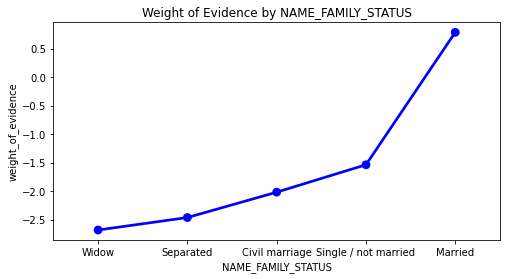

In [34]:
plot_woe(woe(data2, 'NAME_FAMILY_STATUS'))

### WoE: `NAME_HOUSING_TYPE`

In [126]:
woe(data2, 'NAME_HOUSING_TYPE')

,NAME_HOUSING_TYPE,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,Co-op apartment,1122,0.079323,0.003649,4.093785,1117.906215,0.000017,0.017425,-6.942935,NaN,NaN,2.854539
1,Office apartment,2617,0.065724,0.008510,22.271363,2594.728637,0.000092,0.040444,-6.091128,0.000075,0.851807,2.854539
2,Rented apartment,4881,0.123131,0.015873,77.474175,4803.525825,0.000318,0.074872,-5.460353,0.000227,0.630775,2.854539
3,Municipal apartment,11183,0.085397,0.036366,406.682977,10776.317023,0.001671,0.167969,-4.610264,0.001353,0.850089,2.854539
4,With parents,14840,0.116981,0.048258,716.155194,14123.844806,0.002943,0.220146,-4.314915,0.001272,0.295349,2.854539
5,House / apartment,272868,0.077957,0.887344,242127.746403,30740.253597,0.994959,0.479144,0.730700,0.992016,5.045615,2.854539


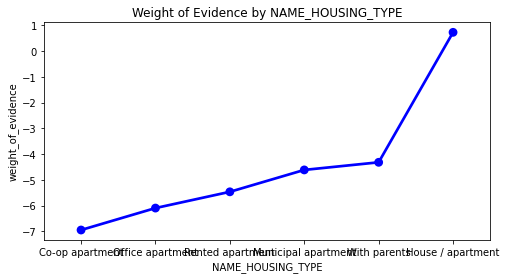

In [127]:
plot_woe(woe(data2, 'NAME_HOUSING_TYPE'))

### WoE: `WEEKDAY_APPR_PROCESS_START`

In [128]:
woe(data2, 'WEEKDAY_APPR_PROCESS_START')

,WEEKDAY_APPR_PROCESS_START,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,SUNDAY,16181,0.079291,0.052619,851.432180,15329.567820,0.017841,0.059008,-1.196180,NaN,NaN,0.072287
1,SATURDAY,33852,0.078873,0.110084,3726.559063,30125.440937,0.078086,0.115962,-0.395446,0.060245,0.800734,0.072287
2,FRIDAY,50338,0.081469,0.163695,8240.076758,42097.923242,0.172663,0.162048,0.063450,0.094576,0.458896,0.072287
3,THURSDAY,50591,0.081003,0.164518,8323.114559,42267.885441,0.174403,0.162702,0.069448,0.001740,0.005998,0.072287
4,MONDAY,50714,0.077572,0.164918,8363.635109,42350.364891,0.175252,0.163019,0.072355,0.000849,0.002907,0.072287
5,WEDNESDAY,51934,0.081604,0.168885,8770.874395,43163.125605,0.183785,0.166148,0.100889,0.008533,0.028534,0.072287
6,TUESDAY,53901,0.083505,0.175282,9447.849999,44453.150001,0.197970,0.171114,0.145790,0.014185,0.044901,0.072287


## Numerical Features

In [18]:
# make a function to show data distribution and info
def dist(feature):
    plt.figure(figsize=(4,2))
    sns.violinplot(data2[feature],color='orange')
    print('number of unique values :',data2[feature].nunique())
    print('Distribution :')
    print(data2[feature].describe().T)

In [56]:
# build new plot function
def plot_num_woe(df,rot=0):
    plt.figure(figsize=(8,4))
    sns.pointplot(x=df.columns[0], y='weight_of_evidence',data=df, color='orange')
    plt.title(str('Weight of Evidence by ' + df.columns[0]))
    plt.xticks(rotation = rot)
    plt.xlabel(' ')

### WoE: `CODE_GENDER` *

In [20]:
data3 = data2.copy()

In [132]:
woe(data2, 'CODE_GENDER')

,CODE_GENDER,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,1,105059,0.101419,0.341643,35892.678574,69166.321426,0.212159,0.5,-0.857273,NaN,NaN,0.377637
1,0,202452,0.069992,0.658357,133285.678574,69166.321426,0.787841,0.5,0.454688,0.575682,1.311961,0.377637


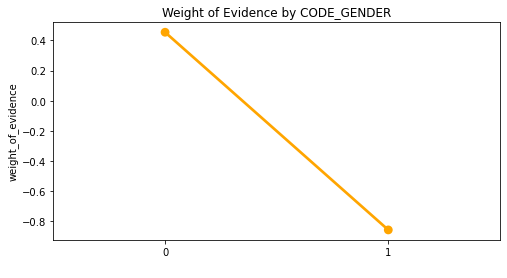

In [134]:
plot_num_woe(woe(data2, 'CODE_GENDER'))

### WoE: `FLAG_OWN_CAR` *

In [135]:
woe(data2, 'FLAG_OWN_CAR')

,FLAG_OWN_CAR,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,1,104587,0.072437,0.340108,35570.891997,69016.108003,0.209884,0.5,-0.868053,NaN,NaN,0.384585
1,0,202924,0.085002,0.659892,133907.891997,69016.108003,0.790116,0.5,0.457572,0.580232,1.325625,0.384585


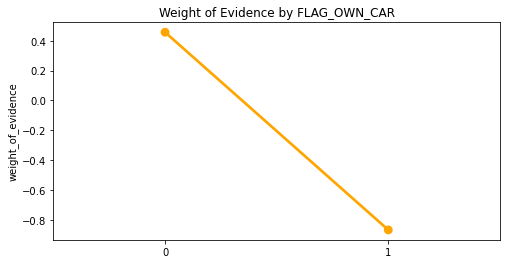

In [136]:
plot_num_woe(woe(data2, 'FLAG_OWN_CAR'))

### WoE: `FLAG_OWN_REALTY`

In [137]:
woe(data2, 'FLAG_OWN_REALTY')

,FLAG_OWN_REALTY,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,0,94199,0.083249,0.306327,28855.720937,65343.279063,0.163189,0.5,-1.119702,NaN,NaN,0.550583
1,1,213312,0.079616,0.693673,147968.720937,65343.279063,0.836811,0.5,0.514991,0.673623,1.634693,0.550583


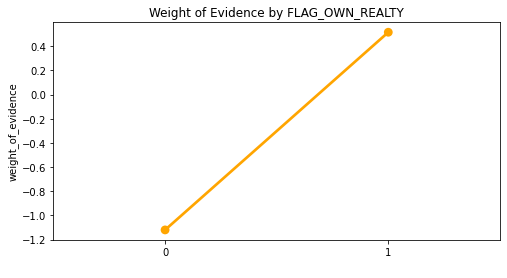

In [138]:
plot_num_woe(woe(data2, 'FLAG_OWN_REALTY'))

### WoE: `CNT_CHILDREN`

In [139]:
woe(data2, 'CNT_CHILDREN')

,CNT_CHILDREN,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,11,1,1.000000,0.000003,0.000003,0.999997,1.966579e-11,0.000007,-12.787485,NaN,NaN,1.278045
1,8,2,0.000000,0.000007,0.000013,1.999987,7.866317e-11,0.000014,-12.094335,5.899738e-11,0.693150,1.278045
2,9,2,1.000000,0.000007,0.000013,1.999987,7.866317e-11,0.000014,-12.094335,0.000000e+00,0.000000,1.278045
3,10,2,0.000000,0.000007,0.000013,1.999987,7.866317e-11,0.000014,-12.094335,0.000000e+00,0.000000,1.278045
4,12,2,0.000000,0.000007,0.000013,1.999987,7.866317e-11,0.000014,-12.094335,0.000000e+00,0.000000,1.278045
5,19,2,0.000000,0.000007,0.000013,1.999987,7.866317e-11,0.000014,-12.094335,0.000000e+00,0.000000,1.278045
6,14,3,0.000000,0.000010,0.000029,2.999971,1.769921e-10,0.000021,-11.688866,9.832897e-11,0.405468,1.278045
7,7,7,0.000000,0.000023,0.000159,6.999841,9.636239e-10,0.000049,-10.841555,7.866317e-10,0.847311,1.278045
8,6,21,0.285714,0.000068,0.001434,20.998566,8.672615e-09,0.000148,-9.742898,7.708991e-09,1.098658,1.278045
9,5,84,0.083333,0.000273,0.022946,83.977054,1.387618e-07,0.000591,-8.356398,1.300892e-07,1.386499,1.278045


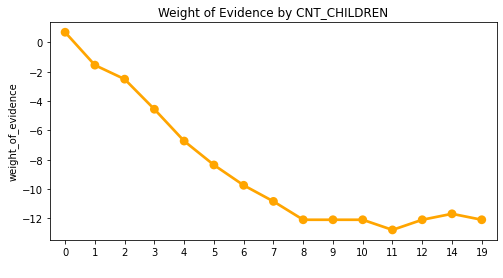

In [140]:
plot_num_woe(woe(data2, 'CNT_CHILDREN'))

### WoE: `AMT_INCOME_TOTAL` *

number of unique values : 2548
Distribution :
count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


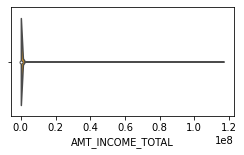

In [143]:
dist('AMT_INCOME_TOTAL')

In [156]:
data2['AMT_INCOME_TOTAL'].describe(percentiles=[0.05,0.1,0.2,0.3,0.6,0.7,0.8,0.9])

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
5%       6.750000e+04
10%      8.100000e+04
20%      9.900000e+04
30%      1.125000e+05
50%      1.471500e+05
60%      1.620000e+05
70%      1.800000e+05
80%      2.250000e+05
90%      2.700000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [157]:
# fine classing = 4 class
data3['AMT_INCOME_TOTAL_FC'] = np.where((data2['AMT_INCOME_TOTAL'] > 0)&(data2['AMT_INCOME_TOTAL'] <= 100000),'0-100k',
                               np.where((data2['AMT_INCOME_TOTAL'] > 100000)&(data2['AMT_INCOME_TOTAL'] <= 150000), '100k-150k',
                               np.where((data2['AMT_INCOME_TOTAL'] > 150000)&(data2['AMT_INCOME_TOTAL'] <= 200000), '150k-200k',
                               np.where((data2['AMT_INCOME_TOTAL'] > 200000)&(data2['AMT_INCOME_TOTAL'] <= 250000), '200k-250k',
                               np.where((data2['AMT_INCOME_TOTAL'] > 250000)&(data2['AMT_INCOME_TOTAL'] <= 300000), '250k-300k','>300k')))))

data3['AMT_INCOME_TOTAL_FC'].value_counts()

100k-150k    91591
150k-200k    64307
0-100k       63698
200k-250k    48137
>300k        22739
250k-300k    17039
Name: AMT_INCOME_TOTAL_FC, dtype: int64

In [158]:
woe(data3, 'AMT_INCOME_TOTAL_FC')

,AMT_INCOME_TOTAL_FC,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,250k-300k,17039,0.070016,0.055409,944.120766,16094.879234,0.014733,0.066118,-1.501365,NaN,NaN,0.24331
1,>300k,22739,0.059501,0.073945,1681.442683,21057.557317,0.026238,0.086504,-1.192970,0.011506,0.308395,0.24331
2,200k-250k,48137,0.077446,0.156537,7535.245142,40601.754858,0.117585,0.166792,-0.349582,0.091347,0.843387,0.24331
3,0-100k,63698,0.082028,0.207141,13194.439236,50503.560764,0.205895,0.207468,-0.007611,0.088310,0.341972,0.24331
4,150k-200k,64307,0.084470,0.209121,13447.942509,50859.057491,0.209851,0.208929,0.004406,0.003956,0.012016,0.24331
5,100k-150k,91591,0.086188,0.297846,27280.036425,64310.963575,0.425697,0.264189,0.477063,0.215846,0.472657,0.24331


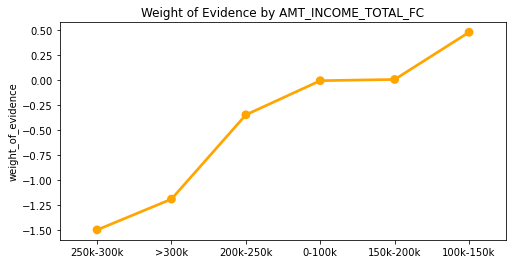

In [159]:
plot_num_woe(woe(data3, 'AMT_INCOME_TOTAL_FC'))

### WoE: `AMT_CREDIT` *

In [49]:
# make a function
def desc(df, feature):
    a = df[feature].describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
    return a

In [165]:
desc(data2, 'AMT_CREDIT')

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
10%      1.800000e+05
20%      2.547000e+05
30%      3.063060e+05
40%      4.320000e+05
50%      5.135310e+05
60%      6.041520e+05
70%      7.551900e+05
80%      9.000000e+05
90%      1.133748e+06
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [170]:
data3['AMT_CREDIT_FC'] = np.where((data2['AMT_CREDIT']>0)&(data2['AMT_CREDIT']<200000),'0-200k',
                      np.where((data2['AMT_CREDIT']>200000)&(data2['AMT_CREDIT']<=400000),'200k-400k',
                      np.where((data2['AMT_CREDIT']>400000)&(data2['AMT_CREDIT']<=600000),'400k-600k',
                      np.where((data2['AMT_CREDIT']>600000)&(data2['AMT_CREDIT']<=800000),'600k-800k',
                      np.where((data2['AMT_CREDIT']>800000)&(data2['AMT_CREDIT']<=1000000),'800k-1m','>1m')))))

data3['AMT_CREDIT_FC'].value_counts()

200k-400k    81151
400k-600k    66270
>1m          49985
600k-800k    43242
0-200k       36144
800k-1m      30719
Name: AMT_CREDIT_FC, dtype: int64

In [172]:
woe(data3, 'AMT_CREDIT_FC')

,AMT_CREDIT_FC,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,800k-1m,30719,0.071682,0.099896,3068.693351,27650.306649,0.053630,0.110472,-0.722653,NaN,NaN,0.156761
1,0-200k,36144,0.068891,0.117537,4248.266683,31895.733317,0.074245,0.127434,-0.540229,0.020615,0.182424,0.156761
2,600k-800k,43242,0.082397,0.140619,6080.662363,37161.337637,0.106269,0.148472,-0.334423,0.032024,0.205806,0.156761
3,>1m,49985,0.058658,0.162547,8124.913336,41860.086664,0.141996,0.167245,-0.163665,0.035726,0.170758,0.156761
4,400k-600k,66270,0.101011,0.215504,14281.482288,51988.517712,0.249591,0.207712,0.183673,0.107596,0.347339,0.156761
5,200k-400k,81151,0.085569,0.263896,21415.444654,59735.555346,0.374269,0.238664,0.449917,0.124677,0.266244,0.156761


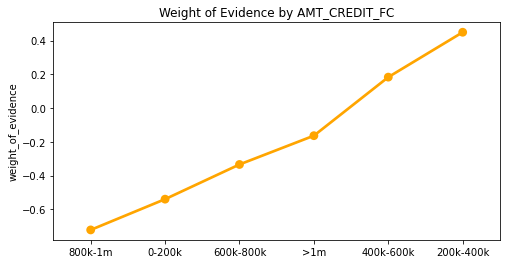

In [173]:
plot_num_woe(woe(data3, 'AMT_CREDIT_FC'))

### WoE: `AMT_ANNUITY` *

In [50]:
desc(data2, 'AMT_ANNUITY')

count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
10%       11074.500000
20%       14701.500000
30%       18189.000000
40%       21870.000000
50%       24903.000000
60%       28062.000000
70%       32004.000000
80%       37516.500000
90%       45954.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [52]:
data3['AMT_ANNUITY_FC'] =  np.where(data2['AMT_ANNUITY']<=20000,'20k',
                          np.where((data2['AMT_ANNUITY']>20000)&(data2['AMT_ANNUITY']<=30000),'30k',
                          np.where((data2['AMT_ANNUITY']>30000)&(data2['AMT_ANNUITY']<=46000),'46k','>46k')))

data3['AMT_ANNUITY_FC'].value_counts()

20k     106505
30k      92478
46k      77896
>46k     30632
Name: AMT_ANNUITY_FC, dtype: int64

In [54]:
woe(data3, 'AMT_ANNUITY_FC')

,AMT_ANNUITY_FC,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,>46k,30632,0.057848,0.099613,3051.336128,27580.663872,0.034880,0.125350,-1.279205,NaN,NaN,0.154
1,46k,77896,0.086153,0.253311,19731.934194,58164.065806,0.225555,0.264347,-0.158699,0.190675,1.120506,0.154
2,30k,92478,0.089297,0.300731,27810.974190,64667.025810,0.317906,0.293902,0.078509,0.092351,0.237209,0.154
3,20k,106505,0.075903,0.346345,36887.509796,69617.490204,0.421659,0.316401,0.287187,0.103753,0.208678,0.154


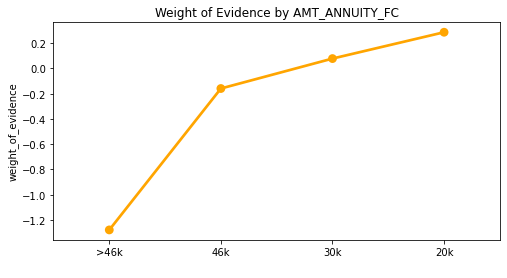

In [57]:
plot_num_woe(woe(data3, 'AMT_ANNUITY_FC'))

### WoE: `AMT_GOODS_PRICE` *

In [59]:
desc(data2, 'AMT_GOODS_PRICE')

count    3.075110e+05
mean     5.383163e+05
std      3.692890e+05
min      4.050000e+04
10%      1.800000e+05
20%      2.250000e+05
30%      2.700000e+05
40%      3.780000e+05
50%      4.500000e+05
60%      5.220000e+05
70%      6.750000e+05
80%      8.145000e+05
90%      1.093500e+06
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [61]:
data3['AMT_GOODS_PRICE_FC'] = np.where(data2['AMT_GOODS_PRICE']<=300000,'300k',
                              np.where((data2['AMT_GOODS_PRICE']>300000)&(data2['AMT_GOODS_PRICE']<=600000),'600k',
                              np.where((data2['AMT_GOODS_PRICE']>600000)&(data2['AMT_GOODS_PRICE']<=900000),'900k','1m')))

data3['AMT_GOODS_PRICE_FC'].value_counts()

300k    104426
600k     91587
900k     69618
1m       41880
Name: AMT_GOODS_PRICE_FC, dtype: int64

In [62]:
woe(data3, 'AMT_GOODS_PRICE_FC')

,AMT_GOODS_PRICE_FC,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,1m,41880,0.051122,0.136190,5703.647674,36176.352326,0.067736,0.162003,-0.871990,NaN,NaN,0.134953
1,900k,69618,0.074837,0.226392,15760.951394,53857.048606,0.187176,0.241179,-0.253488,0.119440,0.618502,0.134953
2,600k,91587,0.099698,0.297833,27277.653707,64309.346293,0.323948,0.287986,0.117673,0.136772,0.371161,0.134953
3,300k,104426,0.079894,0.339585,35461.461463,68964.538537,0.421139,0.308832,0.310164,0.097191,0.192491,0.134953


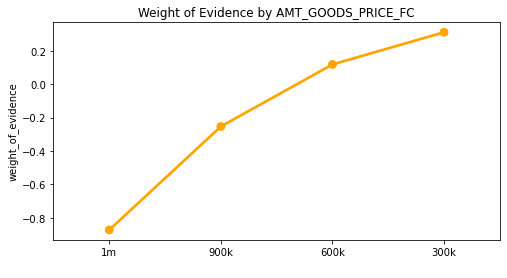

In [63]:
plot_num_woe(woe(data3, 'AMT_GOODS_PRICE_FC'))

### WoE: `REGION_POPULATION_RELATIVE` *

In [174]:
desc(data2, 'REGION_POPULATION_RELATIVE')

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
10%           0.006629
20%           0.008866
30%           0.010643
40%           0.016612
50%           0.018850
60%           0.020713
70%           0.025164
80%           0.030755
90%           0.035792
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64

In [175]:
# fine classing = 4 class
data3['REGION_POPULATION_RELATIVE_FC'] = pd.cut(data2['REGION_POPULATION_RELATIVE'], 4)
data3['REGION_POPULATION_RELATIVE_FC'].value_counts()

(0.0183, 0.0364]      149314
(0.000218, 0.0183]    136343
(0.0364, 0.0545]       13442
(0.0545, 0.0725]        8412
Name: REGION_POPULATION_RELATIVE_FC, dtype: int64

In [177]:
woe(data3,'REGION_POPULATION_RELATIVE_FC')

,REGION_POPULATION_RELATIVE_FC,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,"(0.0545, 0.0725]",8412,0.039705,0.027355,230.111261,8181.888739,0.001720,0.047092,-3.309662,NaN,NaN,0.367548
1,"(0.0364, 0.0545]",13442,0.049323,0.043712,587.580165,12854.419835,0.004392,0.073986,-2.823977,0.002672,0.485685,0.367548
2,"(0.000218, 0.0183]",136343,0.086891,0.443376,60451.215238,75891.784762,0.451906,0.436808,0.033981,0.447514,2.857959,0.367548
3,"(0.0183, 0.0364]",149314,0.080240,0.485557,72500.400298,76813.599702,0.541981,0.442114,0.203663,0.090074,0.169682,0.367548


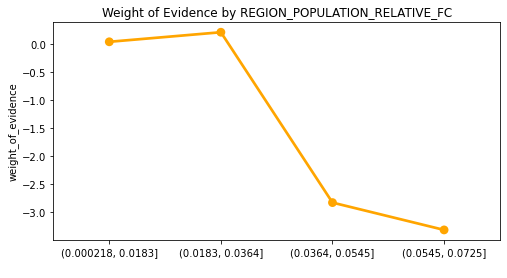

In [178]:
plot_num_woe(woe(data3,'REGION_POPULATION_RELATIVE_FC'))

### WoE: `FLAG_MOBIL`

In [179]:
data2['FLAG_MOBIL'].value_counts()

1    307510
0         1
Name: FLAG_MOBIL, dtype: int64

### WoE: `FLAG_EMP_PHONE`

In [180]:
data2['FLAG_EMP_PHONE'].value_counts()

1    252125
0     55386
Name: FLAG_EMP_PHONE, dtype: int64

In [181]:
woe(data2, 'FLAG_EMP_PHONE')

,FLAG_EMP_PHONE,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,0,55386,0.054003,0.180111,9975.607364,45410.392636,0.046036,0.5,-2.385179,NaN,NaN,1.376053
1,1,252125,0.086600,0.819889,206714.607364,45410.392636,0.953964,0.5,0.646018,0.907927,3.031196,1.376053


### WoE: `FLAG_WORK_PHONE`

In [183]:
data2['FLAG_WORK_PHONE'].value_counts()

0    246203
1     61308
Name: FLAG_WORK_PHONE, dtype: int64

In [184]:
woe(data2, 'FLAG_WORK_PHONE')

,FLAG_WORK_PHONE,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,1,61308,0.096301,0.199368,12222.882642,49085.117358,0.058387,0.5,-2.147506,NaN,NaN,1.2279
1,0,246203,0.076851,0.800632,197117.882642,49085.117358,0.941613,0.5,0.632986,0.883225,2.780492,1.2279


### WoE: `FLAG_CONT_MOBILE`

In [185]:
woe(data2, 'FLAG_CONT_MOBILE')

,FLAG_CONT_MOBILE,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,0,574,0.078397,0.001867,1.071428,572.928572,0.000003,0.5,-11.870393,NaN,NaN,6.281724
1,1,306937,0.080733,0.998133,306364.071428,572.928572,0.999997,0.5,0.693144,0.999993,12.563537,6.281724


### WoE: `FLAG_PHONE`

In [186]:
woe(data2, 'FLAG_PHONE')

,FLAG_PHONE,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,1,86431,0.070357,0.281066,24292.847284,62138.152716,0.132578,0.5,-1.327439,NaN,NaN,0.69015
1,0,221080,0.084784,0.718934,158941.847284,62138.152716,0.867422,0.5,0.550918,0.734844,1.878356,0.69015


### WoE: `FLAG_EMAIL`

In [187]:
woe(data2, 'FLAG_EMAIL')

,FLAG_EMAIL,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,1,17442,0.078775,0.05672,989.308883,16452.691117,0.003603,0.5,-4.932937,NaN,NaN,2.790982
1,0,290069,0.080846,0.94328,273616.308883,16452.691117,0.996397,0.5,0.689538,0.992795,5.622475,2.790982


### WoE: `CNT_FAM_MEMBERS` *

In [189]:
data3['CNT_FAM_MEMBERS_FC'] = np.where(data2['CNT_FAM_MEMBERS'] == 2, '2',
                              np.where((data2['CNT_FAM_MEMBERS']>2)&(data2['CNT_FAM_MEMBERS']<=4),'2-4',
                              np.where((data2['CNT_FAM_MEMBERS']>4)&(data2['CNT_FAM_MEMBERS']<=6),'4-6','>6')))

data3['CNT_FAM_MEMBERS_FC'].value_counts()

2      158359
2-4     77298
>6      67968
4-6      3886
Name: CNT_FAM_MEMBERS_FC, dtype: int64

In [190]:
woe(data3, 'CNT_FAM_MEMBERS_FC')

,CNT_FAM_MEMBERS_FC,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,4-6,3886,0.098302,0.012637,49.107173,3836.892827,0.000423,0.020040,-3.857779,NaN,NaN,0.435982
1,>6,67968,0.083716,0.221026,15022.711461,52945.288539,0.129448,0.276536,-0.759062,0.129025,3.098717,0.435982
2,2-4,77298,0.087247,0.251367,19430.136821,57867.863179,0.167426,0.302247,-0.590703,0.037978,0.168359,0.435982
3,2,158359,0.075834,0.514970,81550.165298,76808.834702,0.702703,0.401177,0.560532,0.535277,1.151236,0.435982


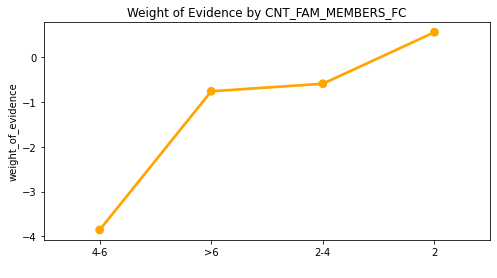

In [191]:
plot_num_woe(woe(data3, 'CNT_FAM_MEMBERS_FC'))

### WoE: `REGION_RATING_CLIENT`

In [192]:
woe(data2, 'REGION_RATING_CLIENT')

,REGION_RATING_CLIENT,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,1,32197,0.048203,0.104702,3371.088543,28825.911457,0.018884,0.223457,-2.470880,NaN,NaN,1.393014
1,3,48330,0.111028,0.157165,7595.789744,40734.210256,0.042551,0.315770,-2.004315,0.023666,0.466565,1.393014
2,2,226984,0.078891,0.738133,167544.368351,59439.631649,0.938565,0.460773,0.711446,0.896014,2.715761,1.393014


### WoE: `REGION_RATING_CLIENT_W_CITY`

In [194]:
woe(data2, 'REGION_RATING_CLIENT_W_CITY')

,REGION_RATING_CLIENT_W_CITY,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,1,34167,0.048409,0.111108,3796.234570,30370.765430,0.020938,0.240649,-2.441767,NaN,NaN,1.450669
1,3,43860,0.114022,0.142629,6255.709877,37604.290123,0.034503,0.297965,-2.155920,0.013565,0.285847,1.450669
2,2,229484,0.079178,0.746263,171255.357551,58228.642449,0.944559,0.461386,0.716482,0.910055,2.872402,1.450669


### WoE: `HOUR_APPR_PROCESS_START` *

In [196]:
# fine classing = 4 class
data3['HOUR_APPR_PROCESS_START_FC'] = pd.cut(data2['HOUR_APPR_PROCESS_START'], 4)
data3['HOUR_APPR_PROCESS_START_FC'].value_counts()

(11.5, 17.25]     152998
(5.75, 11.5]      132435
(17.25, 23.0]      14689
(-0.023, 5.75]      7389
Name: HOUR_APPR_PROCESS_START_FC, dtype: int64

In [197]:
woe(data3, 'HOUR_APPR_PROCESS_START_FC')

,HOUR_APPR_PROCESS_START_FC,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,"(-0.023, 5.75]",7389,0.095818,0.024028,177.545912,7211.454088,0.001325,0.041571,-3.446282,NaN,NaN,0.376016
1,"(17.25, 23.0]",14689,0.069984,0.047767,701.655294,13987.344706,0.005235,0.080631,-2.734551,0.003910,0.711731,0.376016
2,"(5.75, 11.5]",132435,0.084676,0.430668,57035.453122,75399.546878,0.425521,0.434644,-0.021213,0.420286,2.713338,0.376016
3,"(11.5, 17.25]",152998,0.077615,0.497537,76122.115970,76875.884030,0.567920,0.443154,0.248062,0.142399,0.269275,0.376016


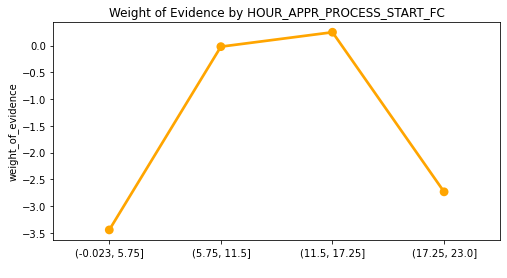

In [199]:
plot_num_woe(woe(data3, 'HOUR_APPR_PROCESS_START_FC'))

### WoE: `REG_REGION_NOT_LIVE_REGION`

In [198]:
woe(data2, 'REG_REGION_NOT_LIVE_REGION')

,REG_REGION_NOT_LIVE_REGION,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,1,4657,0.092978,0.015144,70.526417,4586.473583,0.000236,0.5,-7.656848,NaN,NaN,4.172906
1,0,302854,0.080540,0.984856,298267.526417,4586.473583,0.999764,0.5,0.692911,0.999527,8.349759,4.172906


### WoE: `REG_REGION_NOT_WORK_REGION`

In [200]:
woe(data2, 'REG_REGION_NOT_WORK_REGION')

,REG_REGION_NOT_WORK_REGION,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,1,15612,0.088906,0.050769,792.60431,14819.39569,0.002852,0.5,-5.166445,NaN,NaN,2.911662
1,0,291899,0.080291,0.949231,277079.60431,14819.39569,0.997148,0.5,0.690291,0.994295,5.856736,2.911662


### WoE: `LIVE_REGION_NOT_WORK_REGION`

In [201]:
woe(data2, 'LIVE_REGION_NOT_WORK_REGION')

,LIVE_REGION_NOT_WORK_REGION,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,1,12503,0.084460,0.040659,508.355828,11994.644172,0.001793,0.5,-5.630715,NaN,NaN,3.149698
1,0,295008,0.080571,0.959341,283013.355828,11994.644172,0.998207,0.5,0.691353,0.996414,6.322068,3.149698


### WoE: `REG_CITY_NOT_LIVE_CITY`

In [202]:
woe(data2, 'REG_CITY_NOT_LIVE_CITY')

,REG_CITY_NOT_LIVE_CITY,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,1,24039,0.122260,0.078173,1879.19626,22159.80374,0.00714,0.5,-4.248890,NaN,NaN,2.432201
1,0,283472,0.077207,0.921827,261312.19626,22159.80374,0.99286,0.5,0.685982,0.98572,4.934872,2.432201


### WoE: `REG_CITY_NOT_WORK_CITY`

In [203]:
woe(data2, 'REG_CITY_NOT_WORK_CITY')

,REG_CITY_NOT_WORK_CITY,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,1,70867,0.106114,0.230454,16331.551356,54535.448644,0.0823,0.5,-1.804241,NaN,NaN,1.007286
1,0,236644,0.073127,0.769546,182108.551356,54535.448644,0.9177,0.5,0.607263,0.835401,2.411504,1.007286


### WoE: `LIVE_CITY_NOT_WORK_CITY`

In [204]:
woe(data2, 'LIVE_CITY_NOT_WORK_CITY')

,LIVE_CITY_NOT_WORK_CITY,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,1,55215,0.099665,0.179555,9914.104617,45300.895383,0.045706,0.5,-2.392373,NaN,NaN,1.380479
1,0,252296,0.076585,0.820445,206995.104617,45300.895383,0.954294,0.5,0.646363,0.908588,3.038737,1.380479


### WoE: `EXT_SOURCE_2` *

In [205]:
desc(data2, 'EXT_SOURCE_2')

count    3.075110e+05
mean     5.145034e-01
std      1.908699e-01
min      8.173617e-08
10%      2.162038e-01
20%      3.403762e-01
30%      4.410759e-01
40%      5.127315e-01
50%      5.659614e-01
60%      6.079632e-01
70%      6.456587e-01
80%      6.819170e-01
90%      7.219502e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [206]:
# fine classing = 4 class
data3['EXT_SOURCE_2_FC'] = pd.cut(data2['EXT_SOURCE_2'], 4)
data3['EXT_SOURCE_2_FC'].value_counts()

(0.427, 0.641]        123828
(0.641, 0.855]         95940
(0.214, 0.427]         57362
(-0.000855, 0.214]     30381
Name: EXT_SOURCE_2_FC, dtype: int64

In [207]:
woe(data3, 'EXT_SOURCE_2_FC')

,EXT_SOURCE_2_FC,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,"(-0.000855, 0.214]",30381,0.184194,0.098796,3001.535428,27379.464572,0.032103,0.127933,-1.382552,NaN,NaN,0.28112
1,"(0.214, 0.427]",57362,0.111607,0.186536,10700.101928,46661.898072,0.114444,0.218032,-0.644558,0.082341,0.737995,0.28112
2,"(0.641, 0.855]",95940,0.040848,0.311989,29932.209254,66007.790746,0.320142,0.308427,0.037279,0.205698,0.681837,0.28112
3,"(0.427, 0.641]",123828,0.071938,0.402678,49862.845830,73965.154170,0.533311,0.345608,0.433799,0.213169,0.396520,0.28112


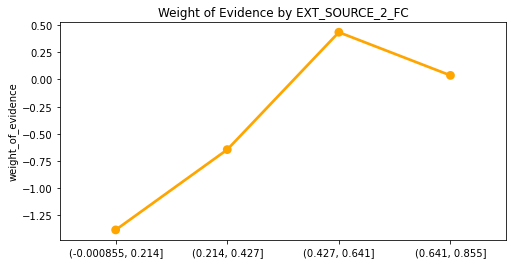

In [208]:
plot_num_woe(woe(data3, 'EXT_SOURCE_2_FC'))

### WoE: `EXT_SOURCE_3` *

In [65]:
# fine classing = 5 class
data3['EXT_SOURCE_3_FC'] = pd.cut(data2['EXT_SOURCE_3'], 5)
data3['EXT_SOURCE_3_FC'].value_counts()

(0.359, 0.538]       127307
(0.538, 0.717]        84194
(0.18, 0.359]         41679
(0.717, 0.896]        38320
(-0.000368, 0.18]     16011
Name: EXT_SOURCE_3_FC, dtype: int64

In [66]:
woe(data3, 'EXT_SOURCE_3_FC')

,EXT_SOURCE_3_FC,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,"(-0.000368, 0.18]",16011,0.220224,0.052066,833.635613,15177.364387,0.009581,0.068832,-1.971941,NaN,NaN,0.463165
1,"(0.717, 0.896]",38320,0.032568,0.124613,4775.186579,33544.813421,0.054879,0.152132,-1.019627,0.045298,0.952315,0.463165
2,"(0.18, 0.359]",41679,0.129514,0.135537,5649.030575,36029.969425,0.064921,0.163403,-0.923044,0.010043,0.096582,0.463165
3,"(0.538, 0.717]",84194,0.046535,0.273792,23051.629490,61142.370510,0.264920,0.277293,-0.045646,0.199999,0.877398,0.463165
4,"(0.359, 0.538]",127307,0.084324,0.413992,52704.040665,74602.959335,0.605699,0.338339,0.582335,0.340779,0.627981,0.463165


### WoE: `OBS_30_CNT_SOCIAL_CIRCLE` *

In [215]:
desc(data2, 'OBS_30_CNT_SOCIAL_CIRCLE')

count    307511.000000
mean          1.417523
std           2.398395
min           0.000000
10%           0.000000
20%           0.000000
30%           0.000000
40%           0.000000
50%           0.000000
60%           1.000000
70%           2.000000
80%           3.000000
90%           4.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [216]:
data3['OBS_30_CNT_SOCIAL_CIRCLE_FC'] = np.where(data2['OBS_30_CNT_SOCIAL_CIRCLE']==0,'0',
                                       np.where((data2['OBS_30_CNT_SOCIAL_CIRCLE']>0)&(data2['OBS_30_CNT_SOCIAL_CIRCLE']<4),'1-4','>4'))

data3['OBS_30_CNT_SOCIAL_CIRCLE_FC'].value_counts()

0      164931
1-4     98913
>4      43667
Name: OBS_30_CNT_SOCIAL_CIRCLE_FC, dtype: int64

In [217]:
woe(data3, 'OBS_30_CNT_SOCIAL_CIRCLE_FC')

,OBS_30_CNT_SOCIAL_CIRCLE_FC,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,>4,43667,0.087274,0.142001,6200.776197,37466.223803,0.049027,0.206956,-1.440130,NaN,NaN,0.413263
1,1-4,98913,0.081162,0.321657,31816.037699,67096.962301,0.251558,0.370630,-0.387533,0.202530,1.052597,0.413263
2,0,164931,0.078736,0.536342,88459.387667,76471.612333,0.699415,0.422414,0.504259,0.447858,0.891792,0.413263


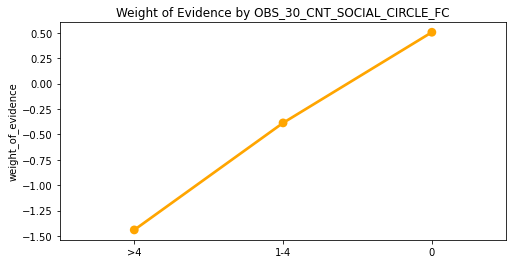

In [219]:
plot_num_woe(woe(data3, 'OBS_30_CNT_SOCIAL_CIRCLE_FC'))

### WoE: `DEF_30_CNT_SOCIAL_CIRCLE`

In [69]:
data3['DEF_30_CNT_SOCIAL_CIRCLE_FC'] = np.where(data2['DEF_30_CNT_SOCIAL_CIRCLE'] == 0, '0',
                                       np.where(data2['DEF_30_CNT_SOCIAL_CIRCLE'] == 1, '1', '>1'))

data3['DEF_30_CNT_SOCIAL_CIRCLE_FC'].value_counts()

0     272345
1      28328
>1      6838
Name: DEF_30_CNT_SOCIAL_CIRCLE_FC, dtype: int64

In [70]:
woe(data3, 'DEF_30_CNT_SOCIAL_CIRCLE_FC')

,DEF_30_CNT_SOCIAL_CIRCLE_FC,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,>1,6838,0.119479,0.022237,152.053891,6685.946109,0.000623,0.105209,-5.128731,NaN,NaN,2.317811
1,1,28328,0.101454,0.092120,2609.583345,25718.416655,0.010697,0.404703,-3.633220,0.010073,1.495511,2.317811
2,0,272345,0.077600,0.885643,241200.474211,31144.525789,0.988680,0.490088,0.701787,0.977983,4.335007,2.317811


### WoE: `OBS_60_CNT_SOCIAL_CIRCLE` *

In [231]:
data3['OBS_60_CNT_SOCIAL_CIRCLE_FC'] = np.where(data2['OBS_60_CNT_SOCIAL_CIRCLE'] == 0, '0',
                                       np.where(data2['OBS_60_CNT_SOCIAL_CIRCLE'] == 1, '1', '>1'))

data3['OBS_60_CNT_SOCIAL_CIRCLE_FC'].value_counts()

0     165687
>1     92954
1      48870
Name: OBS_60_CNT_SOCIAL_CIRCLE_FC, dtype: int64

In [233]:
woe(data3, 'OBS_60_CNT_SOCIAL_CIRCLE_FC')

,OBS_60_CNT_SOCIAL_CIRCLE_FC,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,1,48870,0.079681,0.158921,7766.476321,41103.523679,0.062064,0.22538,-1.289623,NaN,NaN,0.427559
1,>1,92954,0.084709,0.302279,28098.006627,64855.993373,0.224539,0.35562,-0.459816,0.162475,0.829807,0.427559
2,0,165687,0.078805,0.538800,89272.195040,76414.804960,0.713398,0.41900,0.532168,0.488859,0.991984,0.427559


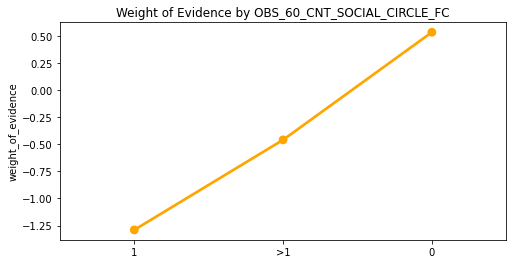

In [234]:
plot_num_woe(woe(data3, 'OBS_60_CNT_SOCIAL_CIRCLE_FC'))

### WoE: `DEF_60_CNT_SOCIAL_CIRCLE`

In [235]:
data3['DEF_60_CNT_SOCIAL_CIRCLE_FC'] = np.where(data2['DEF_60_CNT_SOCIAL_CIRCLE'] == 0, '0',
                                       np.where(data2['DEF_60_CNT_SOCIAL_CIRCLE'] == 1, '1', '>1'))

data3['DEF_60_CNT_SOCIAL_CIRCLE_FC'].value_counts()

0     281742
1      21841
>1      3928
Name: DEF_60_CNT_SOCIAL_CIRCLE_FC, dtype: int64

In [237]:
woe(data3, 'DEF_60_CNT_SOCIAL_CIRCLE_FC')

,DEF_60_CNT_SOCIAL_CIRCLE_FC,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,>1,3928,0.126782,0.012774,50.174413,3877.825587,0.000193,0.081165,-6.040634,NaN,NaN,2.623659
1,1,21841,0.105169,0.071025,1551.259243,20289.740757,0.005972,0.424674,-4.264158,0.005779,1.776476,2.623659
2,0,281742,0.078192,0.916201,258132.406854,23609.593146,0.993834,0.494161,0.698710,0.987862,4.962868,2.623659


### WoE: `FLAG_DOCUMENT_2`

In [239]:
woe(data2, 'FLAG_DOCUMENT_2')

,FLAG_DOCUMENT_2,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,1,13,0.307692,0.000042,0.00055,12.99945,1.787319e-09,0.5,-19.449402,NaN,NaN,10.071274
1,0,307498,0.080719,0.999958,307485.00055,12.99945,1.000000e+00,0.5,0.693147,1.0,20.142549,10.071274


### WoE: `FLAG_DOCUMENT_3`

In [240]:
woe(data2, 'FLAG_DOCUMENT_3')

,FLAG_DOCUMENT_3,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,0,89171,0.061825,0.289977,25857.505068,63313.494932,0.142951,0.5,-1.252108,NaN,NaN,0.639473
1,1,218340,0.088449,0.710023,155026.505068,63313.494932,0.857049,0.5,0.538887,0.714098,1.790995,0.639473


### WoE: `FLAG_DOCUMENT_4`

In [241]:
woe(data2, 'FLAG_DOCUMENT_4')

,FLAG_DOCUMENT_4,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,1,25,0.000000,0.000081,0.002032,24.997968,6.610424e-09,0.5,-18.141471,NaN,NaN,9.417309
1,0,307486,0.080735,0.999919,307461.002032,24.997968,1.000000e+00,0.5,0.693147,1.0,18.834618,9.417309


### WoE: `FLAG_DOCUMENT_5`

In [242]:
woe(data2, 'FLAG_DOCUMENT_5')

,FLAG_DOCUMENT_5,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,1,4648,0.080034,0.015115,70.254085,4577.745915,0.000235,0.5,-7.660775,NaN,NaN,4.174876
1,0,302863,0.080739,0.984885,298285.254085,4577.745915,0.999765,0.5,0.692912,0.999529,8.353687,4.174876


### WoE: `FLAG_DOCUMENT_6`

In [243]:
woe(data2, 'FLAG_DOCUMENT_6')

,FLAG_DOCUMENT_6,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,1,27078,0.055654,0.088055,2384.363759,24693.636241,0.009237,0.5,-3.991360,NaN,NaN,2.294427
1,0,280433,0.083150,0.911945,255739.363759,24693.636241,0.990763,0.5,0.683867,0.981525,4.675226,2.294427


### WoE: `FLAG_DOCUMENT_7`

In [244]:
woe(data2, 'FLAG_DOCUMENT_7')

,FLAG_DOCUMENT_7,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,1,59,0.050847,0.000192,0.01132,58.98868,3.682556e-08,0.5,-16.423926,NaN,NaN,8.558536
1,0,307452,0.080735,0.999808,307393.01132,58.98868,1.000000e+00,0.5,0.693147,1.0,17.117074,8.558536


### WoE: `FLAG_DOCUMENT_8`

In [246]:
woe(data2, 'FLAG_DOCUMENT_8')

,FLAG_DOCUMENT_8,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,1,25024,0.073370,0.081376,2036.351792,22987.648208,0.007786,0.5,-4.162264,NaN,NaN,2.386053
1,0,282487,0.081381,0.918624,259499.351792,22987.648208,0.992214,0.5,0.685331,0.984428,4.847594,2.386053


### WoE: `FLAG_DOCUMENT_9`

In [247]:
woe(data2, 'FLAG_DOCUMENT_9')

,FLAG_DOCUMENT_9,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,1,1198,0.061770,0.003896,4.667163,1193.332837,0.000015,0.5,-10.394776,NaN,NaN,5.543784
1,0,306313,0.080803,0.996104,305119.667163,1193.332837,0.999985,0.5,0.693132,0.999969,11.087908,5.543784


### WoE: `FLAG_DOCUMENT_10`

In [248]:
woe(data2, 'FLAG_DOCUMENT_10')

,FLAG_DOCUMENT_10,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,1,7,0.000000,0.000023,0.000159,6.999841,5.181966e-10,0.5,-20.687519,NaN,NaN,10.690333
1,0,307504,0.080731,0.999977,307497.000159,6.999841,1.000000e+00,0.5,0.693147,1.0,21.380666,10.690333


### WoE: `FLAG_DOCUMENT_11`

In [249]:
woe(data2, 'FLAG_DOCUMENT_11')

,FLAG_DOCUMENT_11,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,1,1203,0.062344,0.003912,4.706202,1198.293798,0.000015,0.5,-10.386414,NaN,NaN,5.539602
1,0,306308,0.080801,0.996088,305109.706202,1198.293798,0.999985,0.5,0.693132,0.999969,11.079545,5.539602


### WoE: `FLAG_DOCUMENT_12`

In [250]:
woe(data2, 'FLAG_DOCUMENT_12')

,FLAG_DOCUMENT_12,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,1,2,0.000000,0.000007,0.000013,1.999987,4.230039e-11,0.5,-23.193078,NaN,NaN,11.943112
1,0,307509,0.080729,0.999993,307507.000013,1.999987,1.000000e+00,0.5,0.693147,1.0,23.886225,11.943112


### WoE: `FLAG_DOCUMENT_13`

In [251]:
woe(data2, 'FLAG_DOCUMENT_13')

,FLAG_DOCUMENT_13,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,1,1084,0.027675,0.003525,3.821184,1080.178816,0.000013,0.5,-10.595509,NaN,NaN,5.64418
1,0,306427,0.080916,0.996475,305346.821184,1080.178816,0.999987,0.5,0.693135,0.999975,11.288643,5.64418


### WoE: `FLAG_DOCUMENT_14`

In [252]:
woe(data2, 'FLAG_DOCUMENT_14')

,FLAG_DOCUMENT_14,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,1,903,0.033223,0.002936,2.651642,900.348358,0.000009,0.5,-10.962067,NaN,NaN,5.827502
1,0,306608,0.080869,0.997064,305707.651642,900.348358,0.999991,0.5,0.693139,0.999983,11.655206,5.827502


### WoE: `FLAG_DOCUMENT_15`

In [253]:
woe(data2, 'FLAG_DOCUMENT_15')

,FLAG_DOCUMENT_15,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,1,372,0.029570,0.00121,0.450013,371.549987,0.000001,0.5,-12.739178,NaN,NaN,6.716142
1,0,307139,0.080791,0.99879,306767.450013,371.549987,0.999999,0.5,0.693146,0.999997,13.432324,6.716142


### WoE: `FLAG_DOCUMENT_16`

In [254]:
woe(data2, 'FLAG_DOCUMENT_16')

,FLAG_DOCUMENT_16,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,1,3053,0.049132,0.009928,30.31049,3022.68951,0.000101,0.5,-8.511770,NaN,NaN,4.601483
1,0,304458,0.081046,0.990072,301435.31049,3022.68951,0.999899,0.5,0.693047,0.999799,9.204817,4.601483


### WoE: `FLAG_DOCUMENT_17`

In [255]:
woe(data2, 'FLAG_DOCUMENT_17')

,FLAG_DOCUMENT_17,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,1,82,0.024390,0.000267,0.021866,81.978134,7.114396e-08,0.5,-15.765413,NaN,NaN,8.229279
1,0,307429,0.080744,0.999733,307347.021866,81.978134,9.999999e-01,0.5,0.693147,1.0,16.45856,8.229279


### WoE: `FLAG_DOCUMENT_18`

In [256]:
woe(data2, 'FLAG_DOCUMENT_18')

,FLAG_DOCUMENT_18,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,1,2500,0.056800,0.00813,20.324476,2479.675524,0.000067,0.5,-8.915034,NaN,NaN,4.803412
1,0,305011,0.080925,0.99187,302531.324476,2479.675524,0.999933,0.5,0.693080,0.999866,9.608114,4.803412


### WoE: `FLAG_DOCUMENT_19`

In [257]:
woe(data2, 'FLAG_DOCUMENT_19')

,FLAG_DOCUMENT_19,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,1,183,0.065574,0.000595,0.108903,182.891097,3.545666e-07,0.5,-14.159223,NaN,NaN,7.426179
1,0,307328,0.080738,0.999405,307145.108903,182.891097,9.999996e-01,0.5,0.693147,0.999999,14.852369,7.426179


### WoE: `FLAG_DOCUMENT_20`

In [258]:
woe(data2, 'FLAG_DOCUMENT_20')

,FLAG_DOCUMENT_20,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,1,156,0.083333,0.000507,0.079139,155.920861,2.576134e-07,0.5,-14.478658,NaN,NaN,7.585899
1,0,307355,0.080727,0.999493,307199.079139,155.920861,9.999997e-01,0.5,0.693147,0.999999,15.171805,7.585899


### WoE: `FLAG_DOCUMENT_21`

In [259]:
woe(data2, 'FLAG_DOCUMENT_21')

,FLAG_DOCUMENT_21,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,1,103,0.135922,0.000335,0.0345,102.9655,1.122649e-07,0.5,-15.309257,NaN,NaN,8.0012
1,0,307408,0.080710,0.999665,307305.0345,102.9655,9.999999e-01,0.5,0.693147,1.0,16.002404,8.0012


### WoE: `AMT_REQ_CREDIT_BUREAU_HOUR`

In [260]:
woe(data2, 'AMT_REQ_CREDIT_BUREAU_HOUR')

,AMT_REQ_CREDIT_BUREAU_HOUR,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,4.0,1,0.000000,0.000003,0.000003,0.999997,1.068741e-11,0.000309,-17.180020,NaN,NaN,5.333021
1,3.0,9,0.000000,0.000029,0.000263,8.999737,8.656799e-10,0.002782,-14.982769,8.549925e-10,2.197251,5.333021
2,2.0,56,0.107143,0.000182,0.010198,55.989802,3.351571e-08,0.017305,-13.154489,3.265003e-08,1.828280,5.333021
3,1.0,1560,0.080128,0.005073,7.913863,1552.086137,2.600887e-05,0.479708,-9.822496,2.597536e-05,3.331993,5.333021
4,0.0,305885,0.080730,0.994712,304267.597663,1617.402337,9.999740e-01,0.499896,0.693329,9.999479e-01,10.515825,5.333021


### WoE: `AMT_REQ_CREDIT_BUREAU_DAY`

In [261]:
woe(data2, 'AMT_REQ_CREDIT_BUREAU_DAY')

,AMT_REQ_CREDIT_BUREAU_DAY,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,8.0,1,0.000000,0.000003,0.000003,0.999997,1.067793e-11,0.000337,-17.268100,NaN,NaN,5.610169
1,9.0,2,0.000000,0.000007,0.000013,1.999987,4.271170e-11,0.000674,-16.574950,3.203378e-11,0.693150,5.610169
2,6.0,8,0.000000,0.000026,0.000208,7.999792,6.833872e-10,0.002698,-15.188636,6.406755e-10,1.386314,5.610169
3,5.0,9,0.000000,0.000029,0.000263,8.999737,8.649120e-10,0.003035,-15.070850,1.815247e-10,0.117786,5.610169
4,4.0,26,0.115385,0.000085,0.002198,25.997802,7.218278e-09,0.008767,-14.009923,6.353366e-09,1.060927,5.610169
5,3.0,45,0.044444,0.000146,0.006585,44.993415,2.162280e-08,0.015173,-13.461295,1.440452e-08,0.548628,5.610169
6,2.0,106,0.103774,0.000345,0.036539,105.963461,1.199772e-07,0.035734,-12.604320,9.835437e-08,0.856975,5.610169
7,1.0,1292,0.096749,0.004201,5.428307,1286.571693,1.782428e-05,0.433873,-10.099947,1.770430e-05,2.504373,5.610169
8,0.0,306022,0.080661,0.995158,304540.209892,1481.790108,9.999820e-01,0.499707,0.693715,9.999642e-01,10.793661,5.610169


### WoE: `AMT_REQ_CREDIT_BUREAU_WEEK`

In [262]:
woe(data2, 'AMT_REQ_CREDIT_BUREAU_WEEK')

,AMT_REQ_CREDIT_BUREAU_WEEK,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,7.0,2,0.000000,0.000007,0.000013,1.999987,4.471599e-11,0.000120,-14.805720,NaN,NaN,3.66269
1,8.0,5,0.000000,0.000016,0.000081,4.999919,2.794749e-10,0.000301,-13.889419,2.347589e-10,0.916300,3.66269
2,5.0,10,0.100000,0.000033,0.000325,9.999675,1.117900e-09,0.000602,-13.196256,8.384247e-10,0.693163,3.66269
3,6.0,20,0.050000,0.000065,0.001301,19.998699,4.471599e-09,0.001204,-12.503076,3.353699e-09,0.693180,3.66269
4,4.0,34,0.117647,0.000111,0.003759,33.996241,1.292292e-08,0.002046,-11.972403,8.451321e-09,0.530674,3.66269
5,3.0,58,0.068966,0.000189,0.010939,57.989061,3.760614e-08,0.003490,-11.438242,2.468322e-08,0.534161,3.66269
6,2.0,199,0.100503,0.000647,0.128779,198.871221,4.426994e-07,0.011969,-10.204921,4.050933e-07,1.233321,3.66269
7,1.0,8208,0.077729,0.026692,219.085704,7988.914296,7.531431e-04,0.480802,-6.458955,7.527004e-04,3.745967,3.66269
8,0.0,298975,0.080799,0.972242,290675.945332,8299.054668,9.992464e-01,0.499467,0.693460,9.984932e-01,7.152415,3.66269


### WoE: `AMT_REQ_CREDIT_BUREAU_MON`

In [263]:
woe(data2, 'AMT_REQ_CREDIT_BUREAU_MON')

,AMT_REQ_CREDIT_BUREAU_MON,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,27.0,1,0.000000,0.000003,0.000003,0.999997,1.414454e-11,0.000013,-13.722304,NaN,NaN,2.348632
1,23.0,1,0.000000,0.000003,0.000003,0.999997,1.414454e-11,0.000013,-13.722304,0.000000e+00,0.000000,2.348632
2,22.0,1,0.000000,0.000003,0.000003,0.999997,1.414454e-11,0.000013,-13.722304,0.000000e+00,0.000000,2.348632
3,24.0,1,0.000000,0.000003,0.000003,0.999997,1.414454e-11,0.000013,-13.722304,0.000000e+00,0.000000,2.348632
4,19.0,3,0.000000,0.000010,0.000029,2.999971,1.273009e-10,0.000039,-12.623685,1.131563e-10,1.098619,2.348632
5,18.0,6,0.000000,0.000020,0.000117,5.999883,5.092034e-10,0.000077,-11.930528,3.819026e-10,0.693157,2.348632
6,17.0,14,0.071429,0.000046,0.000637,13.999363,2.772330e-09,0.000180,-11.083204,2.263126e-09,0.847324,2.348632
7,16.0,23,0.000000,0.000075,0.001720,22.998280,7.482461e-09,0.000296,-10.586738,4.710131e-09,0.496466,2.348632
8,15.0,35,0.028571,0.000114,0.003984,34.996016,1.732706e-08,0.000451,-10.166845,9.844599e-09,0.419893,2.348632
9,14.0,40,0.025000,0.000130,0.005203,39.994797,2.263126e-08,0.000515,-10.033298,5.304202e-09,0.133548,2.348632


### WoE: `AMT_REQ_CREDIT_BUREAU_QRT`

In [264]:
woe(data2, 'AMT_REQ_CREDIT_BUREAU_QRT')

,AMT_REQ_CREDIT_BUREAU_QRT,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,19.0,1,1.000000,0.000003,0.000003,0.999997,1.484260e-11,0.000011,-13.543690,NaN,NaN,2.096768
1,261.0,1,0.000000,0.000003,0.000003,0.999997,1.484260e-11,0.000011,-13.543690,0.000000e+00,0.000000,2.096768
2,7.0,7,0.142857,0.000023,0.000159,6.999841,7.272875e-10,0.000079,-11.597760,7.124449e-10,1.945930,2.096768
3,8.0,7,0.000000,0.000023,0.000159,6.999841,7.272875e-10,0.000079,-11.597760,0.000000e+00,0.000000,2.096768
4,6.0,28,0.250000,0.000091,0.002550,27.997450,1.163660e-08,0.000317,-10.211398,1.090931e-08,1.386363,2.096768
5,5.0,64,0.093750,0.000208,0.013320,63.986680,6.079530e-08,0.000724,-9.384602,4.915870e-08,0.826796,2.096768
6,4.0,476,0.119748,0.001548,0.736806,475.263194,3.362978e-06,0.005375,-7.376726,3.302182e-06,2.007876,2.096768
7,3.0,1717,0.073384,0.005584,9.586938,1707.413062,4.375731e-05,0.019311,-6.089760,4.039434e-05,1.286966,2.096768
8,2.0,14412,0.083472,0.046867,675.441672,13736.558328,3.082894e-03,0.155360,-3.919876,3.039137e-03,2.169884,2.096768
9,1.0,33862,0.065767,0.110116,3728.761065,30133.238935,1.701905e-02,0.340806,-2.996980,1.393615e-02,0.922896,2.096768


### WoE: `AMT_REQ_CREDIT_BUREAU_YEAR` *

In [266]:
desc(data2, 'AMT_REQ_CREDIT_BUREAU_YEAR')

count    307511.000000
mean          1.778463
std           1.765523
min           0.000000
10%           0.000000
20%           0.000000
30%           1.000000
40%           1.000000
50%           1.000000
60%           2.000000
70%           2.000000
80%           3.000000
90%           4.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [267]:
data3['AMT_REQ_CREDIT_BUREAU_YEAR_FC'] = np.where(data2['AMT_REQ_CREDIT_BUREAU_YEAR'] == 0, '0',
                                         np.where(data2['AMT_REQ_CREDIT_BUREAU_YEAR'] == 1, '1',
                                         np.where(data2['AMT_REQ_CREDIT_BUREAU_YEAR'] == 2, '2', '>2')))

data3['AMT_REQ_CREDIT_BUREAU_YEAR_FC'].value_counts()

1     104924
>2     80594
0      71801
2      50192
Name: AMT_REQ_CREDIT_BUREAU_YEAR_FC, dtype: int64

In [268]:
woe(data3, 'AMT_REQ_CREDIT_BUREAU_YEAR_FC')

,AMT_REQ_CREDIT_BUREAU_YEAR_FC,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,2,50192,0.081049,0.163220,8192.347149,41999.652851,0.100053,0.186143,-0.620818,NaN,NaN,0.106978
1,0,71801,0.071350,0.233491,16764.875406,55036.124594,0.204749,0.243921,-0.175061,0.104696,0.445757,0.106978
2,>2,80594,0.083033,0.262085,21122.473134,59471.526866,0.257968,0.263579,-0.021517,0.053219,0.153544,0.106978
3,1,104924,0.085224,0.341204,35800.494213,69123.505787,0.437230,0.306357,0.355710,0.179262,0.377227,0.106978


### WoE: `AGE` *

In [269]:
desc(data2, 'AGE')

count    307511.000000
mean         43.938646
std          11.964047
min          21.000000
10%          28.000000
20%          32.000000
30%          36.000000
40%          39.000000
50%          43.000000
60%          47.000000
70%          52.000000
80%          56.000000
90%          61.000000
max          69.000000
Name: AGE, dtype: float64

In [270]:
data3['AGE_FC'] = np.where((data2['AGE']>20)&(data2['AGE']<=30),'20-30yo',
                  np.where((data2['AGE']>30)&(data2['AGE']<=40),'30-40yo',
                  np.where((data2['AGE']>40)&(data2['AGE']<=50),'40-50yo',
                  np.where((data2['AGE']>50)&(data2['AGE']<=60),'50-60yo','>60yo'))))

data3['AGE_FC'].value_counts()

30-40yo    82770
40-50yo    75509
50-60yo    67955
20-30yo    48869
>60yo      32408
Name: AGE_FC, dtype: int64

In [271]:
woe(data3, 'AGE_FC')

,AGE_FC,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,>60yo,32408,0.049247,0.105388,3415.417543,28992.582457,0.050963,0.120555,-0.861014,NaN,NaN,0.110105
1,20-30yo,48869,0.114449,0.158918,7766.158482,41102.841518,0.115881,0.170911,-0.388575,0.064919,0.472439,0.110105
2,50-60yo,67955,0.060363,0.220984,15016.965328,52938.034672,0.224073,0.220123,0.017785,0.108192,0.406360,0.110105
3,40-50yo,75509,0.075819,0.245549,18541.154889,56967.845111,0.276659,0.236880,0.155233,0.052586,0.137447,0.110105
4,30-40yo,82770,0.094346,0.269161,22278.464510,60491.535490,0.332424,0.251532,0.278844,0.055766,0.123611,0.110105


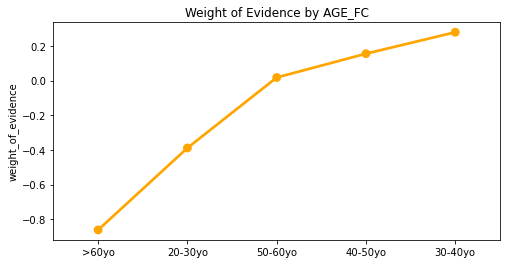

In [292]:
plot_num_woe(woe(data3, 'AGE_FC'))

### WoE: `YEAR_EMP` *

In [272]:
desc(data2, 'YEAR_EMP')

count    307511.000000
mean        185.608021
std         382.165887
min           0.000000
10%           1.000000
20%           2.000000
30%           3.000000
40%           4.000000
50%           6.000000
60%           8.000000
70%          12.000000
80%          25.000000
90%        1001.000000
max        1001.000000
Name: YEAR_EMP, dtype: float64

In [276]:
data3['YEAR_EMP_FC'] = np.where((data2['YEAR_EMP']>0)&(data2['YEAR_EMP']<=2), '0-2 yoe',
                       np.where((data2['YEAR_EMP']>2)&(data2['YEAR_EMP']<=4), '2-4 yoe',
                       np.where((data2['YEAR_EMP']>4)&(data2['YEAR_EMP']<=6), '4-6 yoe',
                       np.where((data2['YEAR_EMP']>6)&(data2['YEAR_EMP']<=8), '6-8 yoe', 
                       np.where((data2['YEAR_EMP']>8)&(data2['YEAR_EMP']<=15),'8-15 yoe',
                       np.where((data2['YEAR_EMP']>15)&(data2['YEAR_EMP']<=30),'15-30 yoe', '>30 yoe'))))))
   
data3['YEAR_EMP_FC'].value_counts()

>30 yoe      67877
0-2 yoe      65326
2-4 yoe      50654
8-15 yoe     43560
4-6 yoe      34563
6-8 yoe      26461
15-30 yoe    19070
Name: YEAR_EMP_FC, dtype: int64

In [277]:
woe(data3, 'YEAR_EMP_FC')

,YEAR_EMP_FC,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,15-30 yoe,19070,0.047090,0.062014,1182.607777,17887.392223,0.023317,0.069657,-1.094399,NaN,NaN,0.165665
1,6-8 yoe,26461,0.072711,0.086049,2276.941381,24184.058619,0.044894,0.094177,-0.740885,0.021577,0.353514,0.165665
2,4-6 yoe,34563,0.083992,0.112396,3884.742234,30678.257766,0.076594,0.119467,-0.444522,0.031700,0.296363,0.165665
3,8-15 yoe,43560,0.059137,0.141653,6170.425123,37389.574877,0.121660,0.145602,-0.179649,0.045066,0.264873,0.165665
4,2-4 yoe,50654,0.099874,0.164723,8343.856695,42310.143305,0.164513,0.164764,-0.001526,0.042853,0.178123,0.165665
5,0-2 yoe,65326,0.112620,0.212435,13877.507718,51448.492282,0.273618,0.200351,0.311664,0.109105,0.313190,0.165665
6,>30 yoe,67877,0.060521,0.220730,14982.511614,52894.488386,0.295405,0.205982,0.360560,0.021787,0.048896,0.165665


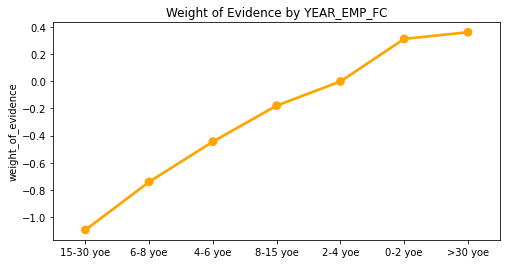

In [278]:
plot_num_woe(woe(data3, 'YEAR_EMP_FC'))

### WoE: `YEAR_REGISTERED` *

In [279]:
desc(data2, 'YEAR_REGISTERED')

count    307511.000000
mean         13.659440
std           9.659369
min           0.000000
10%           2.000000
20%           4.000000
30%           7.000000
40%          10.000000
50%          12.000000
60%          15.000000
70%          19.000000
80%          23.000000
90%          27.000000
max          68.000000
Name: YEAR_REGISTERED, dtype: float64

In [280]:
data3['YEAR_REGISTERED_FC'] = np.where((data2['YEAR_REGISTERED']>0)&(data2['YEAR_REGISTERED']<=2),'0-2 years',
                              np.where((data2['YEAR_REGISTERED']>2)&(data2['YEAR_REGISTERED']<=4),'2-4 years',
                              np.where((data2['YEAR_REGISTERED']>4)&(data2['YEAR_REGISTERED']<=10),'4-10 years',
                              np.where((data2['YEAR_REGISTERED']>10)&(data2['YEAR_REGISTERED']<=15),'10-15 years',
                              np.where((data2['YEAR_REGISTERED']>15)&(data2['YEAR_REGISTERED']<=20),'15-20 years',
                              np.where((data2['YEAR_REGISTERED']>20)&(data2['YEAR_REGISTERED']<=30),'20-30 years', '>30 years'))))))

data3['YEAR_REGISTERED_FC'].value_counts()

4-10 years     65157
20-30 years    59288
10-15 years    58100
15-20 years    41312
0-2 years      31225
>30 years      26533
2-4 years      25896
Name: YEAR_REGISTERED_FC, dtype: int64

In [282]:
woe(data3, 'YEAR_REGISTERED_FC')

,YEAR_REGISTERED_FC,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,2-4 years,25896,0.086809,0.084212,2180.744155,23715.255845,0.044141,0.091882,-0.733119,NaN,NaN,0.14288
1,>30 years,26533,0.069649,0.086283,2289.349288,24243.650712,0.046339,0.093929,-0.706554,0.002198,0.026565,0.14288
2,0-2 years,31225,0.096141,0.101541,3170.620319,28054.379681,0.064177,0.108693,-0.526884,0.017838,0.179670,0.14288
3,15-20 years,41312,0.077096,0.134343,5549.984696,35762.015304,0.112338,0.138555,-0.209758,0.048161,0.317126,0.14288
4,10-15 years,58100,0.086575,0.188936,10977.200816,47122.799184,0.222191,0.182571,0.196397,0.109853,0.406155,0.14288
5,20-30 years,59288,0.065393,0.192800,11430.703110,47857.296890,0.231370,0.185417,0.221413,0.009179,0.025016,0.14288
6,4-10 years,65157,0.086483,0.211885,13805.797676,51351.202324,0.279445,0.198953,0.339733,0.048075,0.118321,0.14288


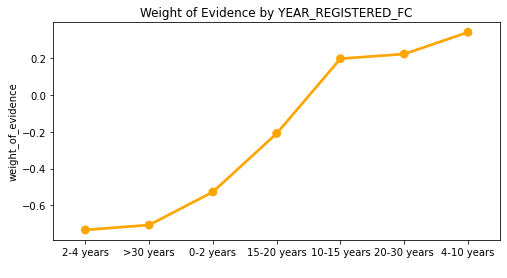

In [283]:
plot_num_woe(woe(data3, 'YEAR_REGISTERED_FC'))

### WoE: `YEAR_PUBLISHED` *

In [284]:
desc(data2, 'YEAR_PUBLISHED')

count    307511.000000
mean          8.198575
std           4.151520
min           0.000000
10%           2.000000
20%           4.000000
30%           6.000000
40%           7.000000
50%           9.000000
60%          11.000000
70%          11.000000
80%          12.000000
90%          13.000000
max          20.000000
Name: YEAR_PUBLISHED, dtype: float64

In [285]:
data3['YEAR_PUBLISHED_FC'] = np.where((data2['YEAR_PUBLISHED']>0)&(data2['YEAR_PUBLISHED']<=4),'0-4 years',
                             np.where((data2['YEAR_PUBLISHED']>4)&(data2['YEAR_PUBLISHED']<=8),'4-8 years',
                             np.where((data2['YEAR_PUBLISHED']>8)&(data2['YEAR_PUBLISHED']<=12),'8-12 years',
                             '>12 years')))

data3['YEAR_PUBLISHED_FC'].value_counts()

8-12 years    114695
4-8 years      72672
0-4 years      65578
>12 years      54566
Name: YEAR_PUBLISHED_FC, dtype: int64

In [286]:
woe(data3, 'YEAR_PUBLISHED_FC')

,YEAR_PUBLISHED_FC,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,>12 years,54566,0.066177,0.177444,9682.412519,44883.587481,0.115791,0.200471,-0.548885,NaN,NaN,0.163333
1,0-4 years,65578,0.098844,0.213254,13984.781305,51593.218695,0.167242,0.230439,-0.320545,0.051451,0.228341,0.163333
2,4-8 years,72672,0.088782,0.236323,17174.083477,55497.916523,0.205382,0.247879,-0.188068,0.038140,0.132477,0.163333
3,8-12 years,114695,0.072191,0.372979,42778.772223,71916.227777,0.511585,0.321211,0.465416,0.306203,0.653484,0.163333


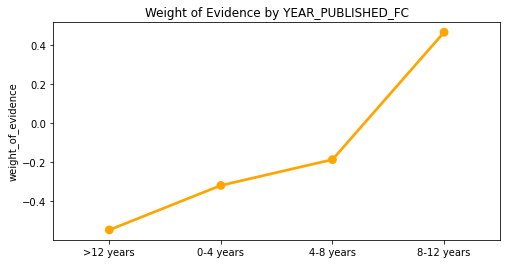

In [290]:
plot_num_woe(woe(data3, 'YEAR_PUBLISHED_FC'))

### WoE: `YEAR_LAST_PHONE_CHANGE` *

In [287]:
desc(data2, 'YEAR_LAST_PHONE_CHANGE')

count    307511.000000
mean          2.632868
std           2.281341
min           0.000000
10%           0.000000
20%           0.000000
30%           1.000000
40%           1.000000
50%           2.000000
60%           3.000000
70%           4.000000
80%           5.000000
90%           6.000000
max          12.000000
Name: YEAR_LAST_PHONE_CHANGE, dtype: float64

In [288]:
data3['YEAR_LAST_PHONE_CHANGE_FC'] = np.where((data2['YEAR_LAST_PHONE_CHANGE']>0)&(data2['YEAR_LAST_PHONE_CHANGE']<=2),'0-2 years',
                                     np.where((data2['YEAR_LAST_PHONE_CHANGE']>2)&(data2['YEAR_LAST_PHONE_CHANGE']<=4),'2-4 years',
                                     np.where((data2['YEAR_LAST_PHONE_CHANGE']>4)&(data2['YEAR_LAST_PHONE_CHANGE']<=6),'4-6 years','>6 years')))

data3['YEAR_LAST_PHONE_CHANGE_FC'].value_counts()

0-2 years    107140
>6 years      85673
2-4 years     66998
4-6 years     47700
Name: YEAR_LAST_PHONE_CHANGE_FC, dtype: int64

In [289]:
woe(data3, 'YEAR_LAST_PHONE_CHANGE_FC')

,YEAR_LAST_PHONE_CHANGE_FC,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,4-6 years,47700,0.061593,0.155116,7399.052392,40300.947608,0.088938,0.179660,-0.703127,NaN,NaN,0.131191
1,2-4 years,66998,0.070659,0.217872,14596.980284,52401.019716,0.175459,0.233602,-0.286215,0.086520,0.416912,0.131191
2,>6 years,85673,0.083924,0.278601,23868.619103,61804.380897,0.286905,0.275522,0.040486,0.111447,0.326702,0.131191
3,0-2 years,107140,0.092990,0.348410,37328.679624,69811.320376,0.448698,0.311216,0.365862,0.161793,0.325375,0.131191


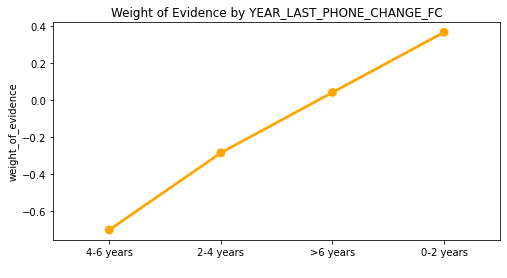

In [291]:
plot_num_woe(woe(data3, 'YEAR_LAST_PHONE_CHANGE_FC'))

## Summary

In [39]:
# we will use these features
list_features = ['CODE_GENDER', 'FLAG_OWN_CAR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE',
                 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE',
                 'OBS_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE', 'YEAR_EMP', 'YEAR_REGISTERED',
                 'YEAR_PUBLISHED', 'YEAR_LAST_PHONE_CHANGE']

len(list_features)

19

In [220]:
data2[list_features].nunique()

CODE_GENDER                        2
FLAG_OWN_CAR                       2
AMT_INCOME_TOTAL                2548
AMT_CREDIT                      5603
AMT_ANNUITY                    13672
AMT_GOODS_PRICE                 1002
REGION_POPULATION_RELATIVE        81
CNT_FAM_MEMBERS                   17
HOUR_APPR_PROCESS_START           24
EXT_SOURCE_2                  119831
EXT_SOURCE_3                     814
OBS_30_CNT_SOCIAL_CIRCLE          33
OBS_60_CNT_SOCIAL_CIRCLE          33
AMT_REQ_CREDIT_BUREAU_YEAR        25
AGE                               49
YEAR_EMP                          51
YEAR_REGISTERED                   66
YEAR_PUBLISHED                    20
YEAR_LAST_PHONE_CHANGE            13
dtype: int64

In [49]:
df_encoding = data2[list_features].copy()
df_target = data2['TARGET']
#df_encoding = data[list_features].copy()

## Feature Encoding

In [50]:
# AMT_INCOME_TOTAL
df_encoding['AMT_INCOME_TOTAL_0_100k'] = np.where(df_encoding['AMT_INCOME_TOTAL']<=100000,1,0)
df_encoding['AMT_INCOME_TOTAL_100k_150k'] = np.where((df_encoding['AMT_INCOME_TOTAL']>100000)&(df_encoding['AMT_INCOME_TOTAL']<=150000),1,0)
df_encoding['AMT_INCOME_TOTAL_150k_200k'] = np.where((df_encoding['AMT_INCOME_TOTAL']>150000)&(df_encoding['AMT_INCOME_TOTAL']<=200000),1,0)
df_encoding['AMT_INCOME_TOTAL_200k_250k'] = np.where((df_encoding['AMT_INCOME_TOTAL']>200000)&(df_encoding['AMT_INCOME_TOTAL']<=250000),1,0)
df_encoding['AMT_INCOME_TOTAL_250k_300k'] = np.where((df_encoding['AMT_INCOME_TOTAL']>250000)&(df_encoding['AMT_INCOME_TOTAL']<=300000),1,0)
df_encoding['AMT_INCOME_TOTAL_>_300k'] = np.where(df_encoding['AMT_INCOME_TOTAL']>300000,1,0)

# AMT_CREDIT
df_encoding['AMT_CREDIT_0_200k'] = np.where(df_encoding['AMT_CREDIT']<=200000,1,0)
df_encoding['AMT_CREDIT_200k_400k'] = np.where((df_encoding['AMT_CREDIT']>200000)&(df_encoding['AMT_CREDIT']<=400000),1,0)
df_encoding['AMT_CREDIT_400k_600k'] = np.where((df_encoding['AMT_CREDIT']>400000)&(df_encoding['AMT_CREDIT']<=600000),1,0)
df_encoding['AMT_CREDIT_600k_800k'] = np.where((df_encoding['AMT_CREDIT']>600000)&(df_encoding['AMT_CREDIT']<=800000),1,0)
df_encoding['AMT_CREDIT_800k_1m'] = np.where((df_encoding['AMT_CREDIT']>800000)&(df_encoding['AMT_CREDIT']<=1000000),1,0)
df_encoding['AMT_CREDIT_1m'] = np.where(df_encoding['AMT_CREDIT']>1000000,1,0)

# AMT_ANNUITY
df_encoding['AMT_ANNUITY_20k'] = np.where(df_encoding['AMT_ANNUITY']<=20000,1,0)
df_encoding['AMT_ANNUITY_30k'] = np.where((df_encoding['AMT_ANNUITY']>20000)&(df_encoding['AMT_ANNUITY']<=30000),1,0)
df_encoding['AMT_ANNUITY_46k'] = np.where((df_encoding['AMT_ANNUITY']>30000)&(df_encoding['AMT_ANNUITY']<=46000),1,0)
df_encoding['AMT_ANNUITY_50k'] = np.where(df_encoding['AMT_ANNUITY']>46000,1,0)


# AMT_GOODS_PRICE
df_encoding['AMT_GOODS_PRICE_300k'] = np.where(df_encoding['AMT_GOODS_PRICE']<=300000,1,0)
df_encoding['AMT_GOODS_PRICE_600k'] = np.where((df_encoding['AMT_GOODS_PRICE']>300000)&(df_encoding['AMT_GOODS_PRICE']<=600000),1,0)
df_encoding['AMT_GOODS_PRICE_900k'] = np.where((df_encoding['AMT_GOODS_PRICE']>600000)&(df_encoding['AMT_GOODS_PRICE']<=900000),1,0)
df_encoding['AMT_GOODS_PRICE_1m'] = np.where(df_encoding['AMT_GOODS_PRICE']>1000000,1,0)

# REGION_POPULATION_RELATIVE
df_encoding['REGION_POPULATION_RELATIVE_1'] = np.where(df_encoding['REGION_POPULATION_RELATIVE']<=0.0183,1,0)
df_encoding['REGION_POPULATION_RELATIVE_2'] = np.where((df_encoding['REGION_POPULATION_RELATIVE']>0.0183)&(df_encoding['REGION_POPULATION_RELATIVE']<=0.0364),1,0)
df_encoding['REGION_POPULATION_RELATIVE_3'] = np.where((df_encoding['REGION_POPULATION_RELATIVE']>0.0364)&(df_encoding['REGION_POPULATION_RELATIVE']<=0.0545),1,0)
df_encoding['REGION_POPULATION_RELATIVE_4'] = np.where((df_encoding['REGION_POPULATION_RELATIVE']>0.0545)&(df_encoding['REGION_POPULATION_RELATIVE']<=0.0725),1,0)

# CNT_FAM_MEMBERS
df_encoding['CNT_FAM_MEMBERS_2'] = np.where(df_encoding['CNT_FAM_MEMBERS']==2,1,0)
df_encoding['CNT_FAM_MEMBERS_2_4'] = np.where((df_encoding['CNT_FAM_MEMBERS']>2)&(df_encoding['CNT_FAM_MEMBERS']<=4),1,0)
df_encoding['CNT_FAM_MEMBERS_4_6'] = np.where((df_encoding['CNT_FAM_MEMBERS']>4)&(df_encoding['CNT_FAM_MEMBERS']<=6),1,0)
df_encoding['CNT_FAM_MEMBERS_6'] = np.where(df_encoding['CNT_FAM_MEMBERS']>6,1,0)

# HOUR_APPR_PROCESS_START
df_encoding['HOUR_APPR_PROCESS_START_0_6'] = np.where(df_encoding['HOUR_APPR_PROCESS_START']<=6,1,0)
df_encoding['HOUR_APPR_PROCESS_START_6_12'] = np.where((df_encoding['HOUR_APPR_PROCESS_START']>6)&(df_encoding['HOUR_APPR_PROCESS_START']<=12),1,0)
df_encoding['HOUR_APPR_PROCESS_START_12_18'] = np.where((df_encoding['HOUR_APPR_PROCESS_START']>12)&(df_encoding['HOUR_APPR_PROCESS_START']<=18),1,0)
df_encoding['HOUR_APPR_PROCESS_START_18'] = np.where(df_encoding['HOUR_APPR_PROCESS_START']>18,1,0)

# EXT_SOURCE_2
df_encoding['EXT_SOURCE_2_2'] = np.where(df_encoding['EXT_SOURCE_2']<=0.214, 1,0)
df_encoding['EXT_SOURCE_2_2_4'] = np.where((df_encoding['EXT_SOURCE_2']>0.214)&(df_encoding['EXT_SOURCE_2']<=0.427),1,0)
df_encoding['EXT_SOURCE_2_4_6'] = np.where((df_encoding['EXT_SOURCE_2']>0.427)&(df_encoding['EXT_SOURCE_2']<=0.641),1,0)
df_encoding['EXT_SOURCE_2_6'] = np.where(df_encoding['EXT_SOURCE_2']>0.641,1,0)

# EXT_SOURCE_3
df_encoding['EXT_SOURCE_3_1'] = np.where(df_encoding['EXT_SOURCE_3']<=0.18,1,0)
df_encoding['EXT_SOURCE_3_2'] = np.where((df_encoding['EXT_SOURCE_3']>0.18)&(df_encoding['EXT_SOURCE_3']<=0.359),1,0)
df_encoding['EXT_SOURCE_3_3'] = np.where((df_encoding['EXT_SOURCE_3']>0.359)&(df_encoding['EXT_SOURCE_3']<=0.538),1,0)
df_encoding['EXT_SOURCE_3_4'] = np.where((df_encoding['EXT_SOURCE_3']>0.538)&(df_encoding['EXT_SOURCE_3']<=0.717),1,0)
df_encoding['EXT_SOURCE_3_5'] = np.where((df_encoding['EXT_SOURCE_3']>0.717)&(df_encoding['EXT_SOURCE_3']<=0.896),1,0)

# OBS_30_CNT_SOCIAL_CIRCLE
df_encoding['OBS_30_CNT_SOCIAL_CIRCLE_0'] = np.where(df_encoding['OBS_30_CNT_SOCIAL_CIRCLE']==0,1,0)
df_encoding['OBS_30_CNT_SOCIAL_CIRCLE_1_4'] = np.where((df_encoding['OBS_30_CNT_SOCIAL_CIRCLE']>0)&(df_encoding['OBS_30_CNT_SOCIAL_CIRCLE']<=4),1,0)
df_encoding['OBS_30_CNT_SOCIAL_CIRCLE_4'] = np.where(df_encoding['OBS_30_CNT_SOCIAL_CIRCLE']>4,1,0)

# OBS_60_CNT_SOCIAL_CIRCLE
df_encoding['OBS_60_CNT_SOCIAL_CIRCLE_0'] = np.where(df_encoding['OBS_60_CNT_SOCIAL_CIRCLE']==0,1,0)
df_encoding['OBS_60_CNT_SOCIAL_CIRCLE_1'] = np.where(df_encoding['OBS_60_CNT_SOCIAL_CIRCLE']==1,1,0)
df_encoding['OBS_60_CNT_SOCIAL_CIRCLE_2'] = np.where(df_encoding['OBS_60_CNT_SOCIAL_CIRCLE']>1,1,0)


# AMT_REQ_CREDIT_BUREAU_YEAR
df_encoding['AMT_REQ_CREDIT_BUREAU_YEAR_0'] = np.where(df_encoding['AMT_REQ_CREDIT_BUREAU_YEAR']==0,1,0)
df_encoding['AMT_REQ_CREDIT_BUREAU_YEAR_1'] = np.where(df_encoding['AMT_REQ_CREDIT_BUREAU_YEAR']==1,1,0)
df_encoding['AMT_REQ_CREDIT_BUREAU_YEAR_2'] = np.where(df_encoding['AMT_REQ_CREDIT_BUREAU_YEAR']>1,1,0)

# AGE
df_encoding['AGE_20_30'] = np.where(df_encoding['AGE']<=30,1,0)
df_encoding['AGE_30_40'] = np.where((df_encoding['AGE']>30)&(df_encoding['AGE']<=40),1,0)
df_encoding['AGE_40_50'] = np.where((df_encoding['AGE']>40)&(df_encoding['AGE']<=50),1,0)
df_encoding['AGE_50_60'] = np.where((df_encoding['AGE']>50)&(df_encoding['AGE']<=60),1,0)
df_encoding['AGE_60'] = np.where(df_encoding['AGE']>60,1,0)

# YEAR_EMP
df_encoding['YEAR_EMP_2'] = np.where(df_encoding['YEAR_EMP']<=2,1,0)
df_encoding['YEAR_EMP_2_4'] = np.where((df_encoding['YEAR_EMP']>2)&(df_encoding['YEAR_EMP']<=4),1,0)
df_encoding['YEAR_EMP_4_6'] = np.where((df_encoding['YEAR_EMP']>4)&(df_encoding['YEAR_EMP']<=6),1,0)
df_encoding['YEAR_EMP_6_8'] = np.where((df_encoding['YEAR_EMP']>6)&(df_encoding['YEAR_EMP']<=8),1,0)
df_encoding['YEAR_EMP_8_15'] = np.where((df_encoding['YEAR_EMP']>8)&(df_encoding['YEAR_EMP']<=15),1,0)
df_encoding['YEAR_EMP_15_30'] = np.where((df_encoding['YEAR_EMP']>15)&(df_encoding['YEAR_EMP']<=30),1,0)
df_encoding['YEAR_EMP_30'] = np.where(df_encoding['YEAR_EMP']>30,1,0)

# YEAR_REGISTERED
df_encoding['YEAR_REGISTERED_2'] = np.where(df_encoding['YEAR_REGISTERED']<=2,1,0)
df_encoding['YEAR_REGISTERED_2_4'] = np.where((df_encoding['YEAR_REGISTERED']>2)&(df_encoding['YEAR_REGISTERED']<=4),1,0)
df_encoding['YEAR_REGISTERED_4_10'] = np.where((df_encoding['YEAR_REGISTERED']>4)&(df_encoding['YEAR_REGISTERED']<=10),1,0)
df_encoding['YEAR_REGISTERED_10_15'] = np.where((df_encoding['YEAR_REGISTERED']>10)&(df_encoding['YEAR_REGISTERED']<=15),1,0)
df_encoding['YEAR_REGISTERED_15_20'] = np.where((df_encoding['YEAR_REGISTERED']>15)&(df_encoding['YEAR_REGISTERED']<=20),1,0)
df_encoding['YEAR_REGISTERED_20_30'] = np.where((df_encoding['YEAR_REGISTERED']>20)&(df_encoding['YEAR_REGISTERED']<=30),1,0)
df_encoding['YEAR_REGISTERED_30'] = np.where(df_encoding['YEAR_REGISTERED']>30,1,0)

# YEAR_PUBLISHED
df_encoding['YEAR_PUBLISHED_4'] = np.where(df_encoding['YEAR_PUBLISHED']<=4,1,0)
df_encoding['YEAR_PUBLISHED_4_8'] = np.where((df_encoding['YEAR_PUBLISHED']>4)&(df_encoding['YEAR_PUBLISHED']<=8),1,0)
df_encoding['YEAR_PUBLISHED_8_12'] = np.where((df_encoding['YEAR_PUBLISHED']>8)&(df_encoding['YEAR_PUBLISHED']<=12),1,0)
df_encoding['YEAR_PUBLISHED_12'] = np.where(df_encoding['YEAR_PUBLISHED']>12,1,0)

# YEAR_LAST_PHONE_CHANGE
df_encoding['YEAR_LAST_PHONE_CHANGE_2'] = np.where(df_encoding['YEAR_LAST_PHONE_CHANGE']<=2,1,0)
df_encoding['YEAR_LAST_PHONE_CHANGE_2_4'] = np.where((df_encoding['YEAR_LAST_PHONE_CHANGE']>2)&(df_encoding['YEAR_LAST_PHONE_CHANGE']<=4),1,0)
df_encoding['YEAR_LAST_PHONE_CHANGE_4_6'] = np.where((df_encoding['YEAR_LAST_PHONE_CHANGE']>4)&(df_encoding['YEAR_LAST_PHONE_CHANGE']<=6),1,0)
df_encoding['YEAR_LAST_PHONE_CHANGE_7'] = np.where(df_encoding['YEAR_LAST_PHONE_CHANGE']>6,1,0)


# drop original features
drop_list = ['AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE',
             'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE',
             'OBS_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE', 'YEAR_EMP', 'YEAR_REGISTERED',
             'YEAR_PUBLISHED', 'YEAR_LAST_PHONE_CHANGE']

df_encoding = df_encoding.drop(drop_list, axis=1)
df_encoding.head()

,CODE_GENDER,FLAG_OWN_CAR,AMT_INCOME_TOTAL_0_100k,AMT_INCOME_TOTAL_100k_150k,AMT_INCOME_TOTAL_150k_200k,AMT_INCOME_TOTAL_200k_250k,AMT_INCOME_TOTAL_250k_300k,AMT_INCOME_TOTAL_>_300k,AMT_CREDIT_0_200k,AMT_CREDIT_200k_400k,AMT_CREDIT_400k_600k,AMT_CREDIT_600k_800k,AMT_CREDIT_800k_1m,AMT_CREDIT_1m,AMT_ANNUITY_20k,AMT_ANNUITY_30k,AMT_ANNUITY_46k,AMT_ANNUITY_50k,AMT_GOODS_PRICE_300k,AMT_GOODS_PRICE_600k,AMT_GOODS_PRICE_900k,AMT_GOODS_PRICE_1m,REGION_POPULATION_RELATIVE_1,REGION_POPULATION_RELATIVE_2,REGION_POPULATION_RELATIVE_3,REGION_POPULATION_RELATIVE_4,CNT_FAM_MEMBERS_2,CNT_FAM_MEMBERS_2_4,CNT_FAM_MEMBERS_4_6,CNT_FAM_MEMBERS_6,HOUR_APPR_PROCESS_START_0_6,HOUR_APPR_PROCESS_START_6_12,HOUR_APPR_PROCESS_START_12_18,HOUR_APPR_PROCESS_START_18,EXT_SOURCE_2_2,EXT_SOURCE_2_2_4,EXT_SOURCE_2_4_6,EXT_SOURCE_2_6,EXT_SOURCE_3_1,EXT_SOURCE_3_2,EXT_SOURCE_3_3,EXT_SOURCE_3_4,EXT_SOURCE_3_5,OBS_30_CNT_SOCIAL_CIRCLE_0,OBS_30_CNT_SOCIAL_CIRCLE_1_4,OBS_30_CNT_SOCIAL_CIRCLE_4,OBS_60_CNT_SOCIAL_CIRCLE_0,OBS_60_CNT_SOCIAL_CIRCLE_1,OBS_60_CNT_SOCIAL_CIRCLE_2,AMT_REQ_CREDIT_BUREAU_YEAR_0,AMT_REQ_CREDIT_BUREAU_YEAR_1,AMT_REQ_CREDIT_BUREAU_YEAR_2,AGE_20_30,AGE_30_40,AGE_40_50,AGE_50_60,AGE_60,YEAR_EMP_2,YEAR_EMP_2_4,YEAR_EMP_4_6,YEAR_EMP_6_8,YEAR_EMP_8_15,YEAR_EMP_15_30,YEAR_EMP_30,YEAR_REGISTERED_2,YEAR_REGISTERED_2_4,YEAR_REGISTERED_4_10,YEAR_REGISTERED_10_15,YEAR_REGISTERED_15_20,YEAR_REGISTERED_20_30,YEAR_REGISTERED_30,YEAR_PUBLISHED_4,YEAR_PUBLISHED_4_8,YEAR_PUBLISHED_8_12,YEAR_PUBLISHED_12,YEAR_LAST_PHONE_CHANGE_2,YEAR_LAST_PHONE_CHANGE_2_4,YEAR_LAST_PHONE_CHANGE_4_6,YEAR_LAST_PHONE_CHANGE_7
0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
2,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
4,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0


In [42]:
df_encoding.shape

(307511, 79)

## Train Test Split

In [51]:
# train test split for feature selection
from sklearn.model_selection import train_test_split

# let's separate into training and testing set
x_train, x_test, y_train, y_test = train_test_split(df_encoding,
                                                    df_target,
                                                    test_size=0.3,
                                                    random_state=51)

x_train.shape, x_test.shape

((215257, 79), (92254, 79))

## Handling Imbalaced

In [106]:
y_train.value_counts()/len(y_train)*100

0    91.859034
1     8.140966
Name: TARGET, dtype: float64

In [52]:
from imblearn.over_sampling import SMOTE

# Random Over Sampling
sm = SMOTE(random_state=0)
sm.fit(x_train, y_train)
x_smote, y_smote = sm.fit_resample(x_train, y_train)

x_smote.shape, x_test.shape, y_smote.shape, y_train.shape

((395466, 79), (92254, 79), (395466,), (215257,))

# Modeling

## Find Pvalues

In [53]:
import statsmodels.api as sm

X2 = sm.add_constant(x_smote)
est = sm.OLS(y_smote, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 TARGET   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                 1.732e+04
Date:                Tue, 27 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:15:21   Log-Likelihood:                 6732.4
No. Observations:              395466   AIC:                        -1.331e+04
Df Residuals:                  395387   BIC:                        -1.245e+04
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

## Training Logistic Regression

In [54]:
# train model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

param = {
    'penalty' : ['none', 'l2', 'l1', 'elasticnet'],
    'C' : [float(x) for x in np.linspace(start=0, stop=1, num=75)]
     }

# stratified kfold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)
lr = LogisticRegression()

# search
lr_clf = RandomizedSearchCV(lr,
                            param,
                            scoring='roc_auc',
                            cv=skf,
                            refit=True) # refits best model to entire dataset

search_lr = lr_clf.fit(x_smote,y_smote)

# best hyperparameters
search_lr.best_params_

{'penalty': 'none', 'C': 0.5540540540540541}

In [55]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc, confusion_matrix

best_params = search_lr.best_params_
lr_tuning = LogisticRegression(**best_params)
lr_tuning.fit(x_smote,y_smote)

y_train_pred_proba = lr_tuning.predict_proba(x_train)[:][:,1]
y_test_pred_lr_proba = lr_tuning.predict_proba(x_test)[:][:,1]

print('AUC Train Proba :', roc_auc_score(y_train, y_train_pred_proba))
print('AUC Test Proba :', roc_auc_score(y_test, y_test_pred_lr_proba))

AUC Train Proba : 0.729115962902176
AUC Test Proba : 0.7265784545500511


In [56]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

y_train_proba = lr_tuning.predict_proba(x_train)[:][:,1]
y_test_proba = lr_tuning.predict_proba(x_test)[:][:,1]

y_train_pred = lr_tuning.predict(x_train)
y_test_pred = lr_tuning.predict(x_test)

print('TRAINING RESULT:')
print('======================================================')
print('AUC Score:', np.round(roc_auc_score(y_train, y_train_proba),3))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_train, y_train_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_train, y_train_pred))

print('\n======================================================')

print('\nTESTING RESULT:')
print('======================================================')
print('AUC Score:', np.round(roc_auc_score(y_test, y_test_proba),3))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_test, y_test_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_test, y_test_pred))

TRAINING RESULT:
AUC Score: 0.729
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    197733
           1       0.43      0.01      0.01     17524

    accuracy                           0.92    215257
   macro avg       0.67      0.50      0.48    215257
weighted avg       0.88      0.92      0.88    215257

Confussion Matrix ------------------------------------
[[197590    143]
 [ 17416    108]]


TESTING RESULT:
AUC Score: 0.727
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84953
           1       0.45      0.01      0.02      7301

    accuracy                           0.92     92254
   macro avg       0.69      0.50      0.49     92254
weighted avg       0.88      0.92      0.88     92254

Confussion Matrix ------------------------------------
[[84881    72]
 [ 7242

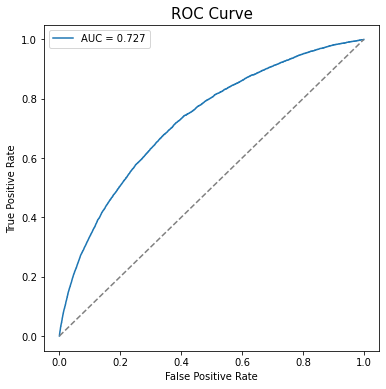

In [132]:
fpr, tpr, tr = roc_curve(y_test, y_test_proba)
auc = roc_auc_score(y_test, y_test_proba)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='AUC = %0.3f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='grey')
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.title('ROC Curve', fontsize=15)
plt.legend()

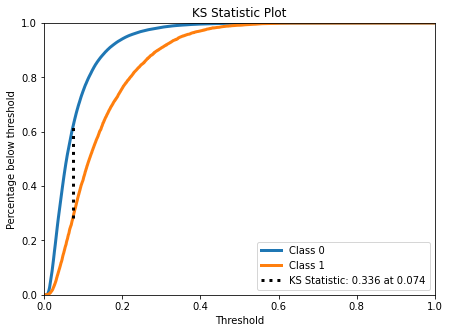

In [136]:
import scikitplot as skplt
y_pred_proba = lr_tuning.predict_proba(x_test)

skplt.metrics.plot_ks_statistic(y_test, y_pred_proba, figsize=(7,5));

## Training Decision Tree

min_samples_split: 2; train: 0.998; test: 0.538
min_samples_split: 4; train: 0.895; test: 0.536
min_samples_split: 7; train: 0.811; test: 0.531
min_samples_split: 10; train: 0.764; test: 0.532
min_samples_split: 13; train: 0.733; test: 0.533
min_samples_split: 16; train: 0.713; test: 0.532
min_samples_split: 19; train: 0.696; test: 0.532
min_samples_split: 22; train: 0.685; test: 0.531
min_samples_split: 25; train: 0.675; test: 0.532
min_samples_split: 27; train: 0.67; test: 0.533
min_samples_split: 30; train: 0.663; test: 0.534
min_samples_split: 33; train: 0.658; test: 0.535
min_samples_split: 36; train: 0.653; test: 0.535
min_samples_split: 39; train: 0.647; test: 0.536
min_samples_split: 42; train: 0.643; test: 0.535
min_samples_split: 45; train: 0.64; test: 0.535
min_samples_split: 48; train: 0.637; test: 0.535
min_samples_split: 51; train: 0.633; test: 0.535
min_samples_split: 53; train: 0.631; test: 0.536
min_samples_split: 56; train: 0.628; test: 0.538
min_samples_split: 59; tr

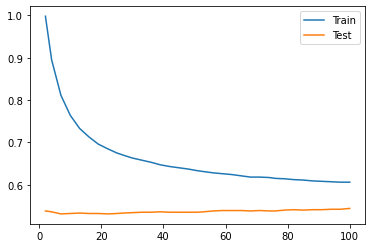

In [139]:
from sklearn.tree import DecisionTreeClassifier

#values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
values = [int(x) for x in np.linspace(start=2, stop=100, num=35)] # min_samples_split
#values = [int(x) for x in np.linspace(start=1, stop=40, num=25)] # min_samples_leaf
#values = ['gini', 'entropy'] # criterion

train_score = []
test_score = []

for x in values :
    model_dt_tunned = DecisionTreeClassifier(min_samples_split=x, 
                                             random_state=123)
    model_dt_tunned.fit(x_smote,y_smote)
    
    # eval on train
    y_pred_train_dt = model_dt_tunned.predict(x_train)
    train_dt = (np.round(roc_auc_score(y_train, y_pred_train_dt),3))
    train_score.append(train_dt)
    
    # eval on test
    y_pred_test_dt = model_dt_tunned.predict(x_test)
    test_dt = (np.round(roc_auc_score(y_test, y_pred_test_dt),3))
    test_score.append(test_dt)
    
    print('min_samples_split: ' + str(x) + '; train: ' + str(train_dt) + '; test: ' + str(test_dt))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

min_samples_leaf: 1; train: 0.663; test: 0.534
min_samples_leaf: 2; train: 0.655; test: 0.534
min_samples_leaf: 4; train: 0.653; test: 0.536
min_samples_leaf: 5; train: 0.653; test: 0.536
min_samples_leaf: 7; train: 0.65; test: 0.536
min_samples_leaf: 9; train: 0.648; test: 0.535
min_samples_leaf: 10; train: 0.646; test: 0.535
min_samples_leaf: 12; train: 0.641; test: 0.537
min_samples_leaf: 14; train: 0.638; test: 0.539
min_samples_leaf: 15; train: 0.638; test: 0.541
min_samples_leaf: 17; train: 0.632; test: 0.541
min_samples_leaf: 18; train: 0.628; test: 0.542
min_samples_leaf: 20; train: 0.624; test: 0.545
min_samples_leaf: 22; train: 0.62; test: 0.545
min_samples_leaf: 23; train: 0.62; test: 0.544
min_samples_leaf: 25; train: 0.619; test: 0.548
min_samples_leaf: 27; train: 0.617; test: 0.548
min_samples_leaf: 28; train: 0.615; test: 0.548
min_samples_leaf: 30; train: 0.612; test: 0.55
min_samples_leaf: 31; train: 0.611; test: 0.55
min_samples_leaf: 33; train: 0.61; test: 0.55
min_s

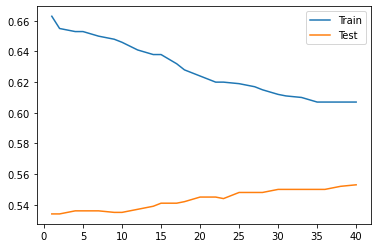

In [141]:
#values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
#values = [int(x) for x in np.linspace(start=2, stop=100, num=35)] # min_samples_split
values = [int(x) for x in np.linspace(start=1, stop=40, num=25)] # min_samples_leaf
#values = ['gini', 'entropy'] # criterion

train_score = []
test_score = []

for x in values :
    model_dt_tunned = DecisionTreeClassifier(min_samples_split=30,
                                             min_samples_leaf=x,
                                             random_state=123)
    model_dt_tunned.fit(x_smote,y_smote)
    
    # eval on train
    y_pred_train_dt = model_dt_tunned.predict(x_train)
    train_dt = (np.round(roc_auc_score(y_train, y_pred_train_dt),3))
    train_score.append(train_dt)
    
    # eval on test
    y_pred_test_dt = model_dt_tunned.predict(x_test)
    test_dt = (np.round(roc_auc_score(y_test, y_pred_test_dt),3))
    test_score.append(test_dt)
    
    print('min_samples_leaf: ' + str(x) + '; train: ' + str(train_dt) + '; test: ' + str(test_dt))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

max_depth: 1; train: 0.583; test: 0.585
max_depth: 2; train: 0.606; test: 0.612
max_depth: 3; train: 0.606; test: 0.612
max_depth: 4; train: 0.634; test: 0.632
max_depth: 5; train: 0.646; test: 0.642
max_depth: 6; train: 0.611; test: 0.611
max_depth: 7; train: 0.635; test: 0.632
max_depth: 8; train: 0.618; test: 0.613
max_depth: 9; train: 0.613; test: 0.608
max_depth: 10; train: 0.612; test: 0.604
max_depth: 11; train: 0.615; test: 0.604
max_depth: 12; train: 0.614; test: 0.601
max_depth: 13; train: 0.612; test: 0.592
max_depth: 14; train: 0.615; test: 0.588
max_depth: 15; train: 0.625; test: 0.588
max_depth: 16; train: 0.625; test: 0.576
max_depth: 17; train: 0.631; test: 0.573
max_depth: 18; train: 0.63; test: 0.566
max_depth: 19; train: 0.631; test: 0.561
max_depth: 20; train: 0.633; test: 0.56
max_depth: 21; train: 0.63; test: 0.557
max_depth: 22; train: 0.627; test: 0.552
max_depth: 23; train: 0.625; test: 0.55
max_depth: 24; train: 0.625; test: 0.548
max_depth: 25; train: 0.625; 

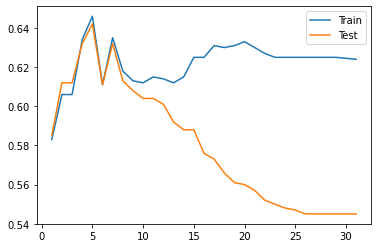

In [143]:
values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
#values = [int(x) for x in np.linspace(start=2, stop=100, num=35)] # min_samples_split
#values = [int(x) for x in np.linspace(start=1, stop=40, num=25)] # min_samples_leaf
#values = ['gini', 'entropy'] # criterion

train_score = []
test_score = []

for x in values :
    model_dt_tunned = DecisionTreeClassifier(min_samples_split=30,
                                             min_samples_leaf=20,
                                             max_depth=x,
                                             random_state=123)
    model_dt_tunned.fit(x_smote,y_smote)
    
    # eval on train
    y_pred_train_dt = model_dt_tunned.predict(x_train)
    train_dt = (np.round(roc_auc_score(y_train, y_pred_train_dt),3))
    train_score.append(train_dt)
    
    # eval on test
    y_pred_test_dt = model_dt_tunned.predict(x_test)
    test_dt = (np.round(roc_auc_score(y_test, y_pred_test_dt),3))
    test_score.append(test_dt)
    
    print('max_depth: ' + str(x) + '; train: ' + str(train_dt) + '; test: ' + str(test_dt))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

In [145]:
model_dt_tunned = DecisionTreeClassifier(min_samples_split=30,
                                             min_samples_leaf=20,
                                             max_depth=5,
                                             random_state=123)
model_dt_tunned.fit(x_smote,y_smote)
    
# eval on train
y_pred_train_dt = model_dt_tunned.predict(x_train)
train_dt = (np.round(roc_auc_score(y_train, y_pred_train_dt),3))

# eval on test
y_pred_test_dt = model_dt_tunned.predict(x_test)
test_dt = (np.round(roc_auc_score(y_test, y_pred_test_dt),3))
    
print('AUC Train', train_dt)
print('AUC Test', test_dt)

AUC Train 0.646
AUC Test 0.642


we will choose `logistic regression`

## Feature Importance

In [58]:
# Top 5 feature importance and its indicator
# Converting statsmodels summary object to Pandas Dataframe,
df_importance = pd.read_html(est2.summary().tables[1].as_html(),header=0,index_col=0)[0]

# find odds_ratio
for i in df_importance['coef']:
    if i == 0 :
        df_importance['odds_ratio'] = 0
    else:
        df_importance['odds_ratio'] = np.exp(df_importance['coef'])
        
# show top 5 highest odd ratio
df_importance.iloc[1:,:].sort_values(by='odds_ratio', ascending=False).head(10)

,coef,std err,t,P>|t|,[0.025,0.975],odds_ratio
CODE_GENDER,3.100000e-03,1.000000e-03,3.504,0.000,1.000000e-03,5.000000e-03,1.003105
REGION_POPULATION_RELATIVE_4,3.021000e-16,7.120000e-17,4.240,0.000,1.620000e-16,4.420000e-16,1.000000
FLAG_OWN_CAR,-4.470000e-02,1.000000e-03,-46.853,0.000,-4.700000e-02,-4.300000e-02,0.956284
CNT_FAM_MEMBERS_2,-6.430000e-02,1.000000e-03,-70.838,0.000,-6.600000e-02,-6.300000e-02,0.937724
CNT_FAM_MEMBERS_6,-7.340000e-02,2.700000e-02,-2.724,0.006,-1.260000e-01,-2.100000e-02,0.929229
CNT_FAM_MEMBERS_2_4,-7.880000e-02,1.000000e-03,-70.033,0.000,-8.100000e-02,-7.700000e-02,0.924225
AMT_GOODS_PRICE_300k,-8.000000e-02,2.000000e-03,-33.689,0.000,-8.500000e-02,-7.500000e-02,0.923116
AMT_GOODS_PRICE_1m,-9.100000e-02,2.000000e-03,-36.933,0.000,-9.600000e-02,-8.600000e-02,0.913018
CNT_FAM_MEMBERS_4_6,-1.025000e-01,4.000000e-03,-23.335,0.000,-1.110000e-01,-9.400000e-02,0.902578
AMT_GOODS_PRICE_900k,-1.196000e-01,2.000000e-03,-61.525,0.000,-1.230000e-01,-1.160000e-01,0.887275


- Male borrowers have higher odds of being a borrowers with payment difficulties 1.003 times than female
- Borrowers who live in population relative 4 have higher odds of being a borrowers with payment difficulties 1 times than other area
- Borrowers who have a car have higher odds of being a borrowers with payment difficulties 0.95 times than borrowers with no car
- Borrowers who have no children have higher odds of being a borrowers with payment difficulties 0.93 than other CNT_FAM_MEMBER
- Borrowers with 4 or more children have higher odds of being a borrowers with payment difficulties 0.92 than other CNT_FAM_MEMBER

# Predict New Dataset

In [ ]:
y_train_pred_proba = lr_tuning.predict_proba(x_train)[:][:,1]
y_test_pred_lr_proba = lr_tuning.predict_proba(x_test)[:][:,1]

print('AUC Train Proba :', roc_auc_score(y_train, y_train_pred_proba))
print('AUC Test Proba :', roc_auc_score(y_test, y_test_pred_lr_proba))

In [225]:
# Predict New Dataset
data_to_predict = df_encoding
data_to_predict.shape

(48744, 79)

In [228]:
# predict
df_predicted = lr_tuning.predict_proba(data_to_predict)[:][:,1]
df_predicted

array([0.12131351, 0.14273817, 0.0218813 , ..., 0.11311431, 0.07631491,
       0.1171715 ])

# Creating Score Card

In [201]:
# set new index
df_importance = df_importance.reset_index()

# rename columns
df_importance = df_importance.rename(columns = {'index' : 'feature'})

# creat new columns feature_name (stand for original feature name)
df_importance['feature_name'] = df_importance['feature']

df_importance['feature_name'][3:9] = 'AMT_INCOME_TOTAL'
df_importance['feature_name'][9:15] = 'AMT_CREDIT'
df_importance['feature_name'][15:19] = 'AMT_ANNUITY'
df_importance['feature_name'][19:23] = 'AMT_GOODS_PRICE'
df_importance['feature_name'][23:27] = 'REGION_POPULATION_RELATIVE'
df_importance['feature_name'][27:31] = 'CNT_FAM_MEMBERS'
df_importance['feature_name'][31:35] = 'HOUR_APPR_PROCESS_START'
df_importance['feature_name'][35:39] = 'EXT_SOURCE_2'
df_importance['feature_name'][39:44] = 'EXT_SOURCE_3'
df_importance['feature_name'][44:47] = 'OBS_30_CNT_SOCIAL_CIRCLE'
df_importance['feature_name'][47:50] = 'OBS_60_CNT_SOCIAL_CIRCLE'
df_importance['feature_name'][50:53] = 'AMT_REQ_CREDIT_BUREAU_YEAR'
df_importance['feature_name'][53:58] = 'AGE'
df_importance['feature_name'][58:65] = 'YEAR_EMP'
df_importance['feature_name'][65:72] = 'YEAR_REGISTERED'
df_importance['feature_name'][72:76] = 'YEAR_PUBLISHED'
df_importance['feature_name'][76:80] = 'YEAR_LAST_PHONE_CHANGE'

## Scoring Each Features

we are using FICO scale to make credit score card.
- min score: 300
- max score: 850

In [202]:
# copy dataset
df_scorecard = df_importance.copy()

# define max and min score
min_score = 300
max_score = 850

In [203]:
# aggregate min and sum
min_sum_coef = df_scorecard.groupby('feature_name')['coef'].min().sum()

# aggregate max and sum
max_sum_coef = df_scorecard.groupby('feature_name')['coef'].max().sum()

# define credit score
df_scorecard['Score - Calculation'] = df_scorecard['coef'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)

# adjust intercept values
df_scorecard['Score - Calculation'][0] = ((df_scorecard['coef'][0] - min_sum_coef) / ((max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score)

# round credit score
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()

In [204]:
# check min score, it shoud be = 300
min_sum_score_prel = df_scorecard.groupby('feature_name')['Score - Preliminary'].min().sum()
# check max score, it should be = 850
max_sum_score_prel = df_scorecard.groupby('feature_name')['Score - Preliminary'].max().sum()

print('min score', min_sum_score_prel)
print('max score', max_sum_score_prel)

min score 301.0
max score 851.0


this error due to round(), we will adjust the values

In [205]:
# check difference
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']

In [208]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard['Score - Final'][4] = -107
df_scorecard['Score - Final'][8] = -132

# check min score, it shoud be = 300
min_sum_score_prel = df_scorecard.groupby('feature_name')['Score - Final'].min().sum()
# check max score, it should be = 850
max_sum_score_prel = df_scorecard.groupby('feature_name')['Score - Final'].max().sum()

print('min score', min_sum_score_prel)
print('max score', max_sum_score_prel)

min score 300.0
max score 850.0


## Score Card FICO Scale (300-850)

In [230]:
# define data
df = data_to_predict
df.head()

,CODE_GENDER,FLAG_OWN_CAR,AMT_INCOME_TOTAL_0_100k,AMT_INCOME_TOTAL_100k_150k,AMT_INCOME_TOTAL_150k_200k,AMT_INCOME_TOTAL_200k_250k,AMT_INCOME_TOTAL_250k_300k,AMT_INCOME_TOTAL_>_300k,AMT_CREDIT_0_200k,AMT_CREDIT_200k_400k,AMT_CREDIT_400k_600k,AMT_CREDIT_600k_800k,AMT_CREDIT_800k_1m,AMT_CREDIT_1m,AMT_ANNUITY_20k,AMT_ANNUITY_30k,AMT_ANNUITY_46k,AMT_ANNUITY_50k,AMT_GOODS_PRICE_300k,AMT_GOODS_PRICE_600k,AMT_GOODS_PRICE_900k,AMT_GOODS_PRICE_1m,REGION_POPULATION_RELATIVE_1,REGION_POPULATION_RELATIVE_2,REGION_POPULATION_RELATIVE_3,REGION_POPULATION_RELATIVE_4,CNT_FAM_MEMBERS_2,CNT_FAM_MEMBERS_2_4,CNT_FAM_MEMBERS_4_6,CNT_FAM_MEMBERS_6,HOUR_APPR_PROCESS_START_0_6,HOUR_APPR_PROCESS_START_6_12,HOUR_APPR_PROCESS_START_12_18,HOUR_APPR_PROCESS_START_18,EXT_SOURCE_2_2,EXT_SOURCE_2_2_4,EXT_SOURCE_2_4_6,EXT_SOURCE_2_6,EXT_SOURCE_3_1,EXT_SOURCE_3_2,EXT_SOURCE_3_3,EXT_SOURCE_3_4,EXT_SOURCE_3_5,OBS_30_CNT_SOCIAL_CIRCLE_0,OBS_30_CNT_SOCIAL_CIRCLE_1_4,OBS_30_CNT_SOCIAL_CIRCLE_4,OBS_60_CNT_SOCIAL_CIRCLE_0,OBS_60_CNT_SOCIAL_CIRCLE_1,OBS_60_CNT_SOCIAL_CIRCLE_2,AMT_REQ_CREDIT_BUREAU_YEAR_0,AMT_REQ_CREDIT_BUREAU_YEAR_1,AMT_REQ_CREDIT_BUREAU_YEAR_2,AGE_20_30,AGE_30_40,AGE_40_50,AGE_50_60,AGE_60,YEAR_EMP_2,YEAR_EMP_2_4,YEAR_EMP_4_6,YEAR_EMP_6_8,YEAR_EMP_8_15,YEAR_EMP_15_30,YEAR_EMP_30,YEAR_REGISTERED_2,YEAR_REGISTERED_2_4,YEAR_REGISTERED_4_10,YEAR_REGISTERED_10_15,YEAR_REGISTERED_15_20,YEAR_REGISTERED_20_30,YEAR_REGISTERED_30,YEAR_PUBLISHED_4,YEAR_PUBLISHED_4_8,YEAR_PUBLISHED_8_12,YEAR_PUBLISHED_12,YEAR_LAST_PHONE_CHANGE_2,YEAR_LAST_PHONE_CHANGE_2_4,YEAR_LAST_PHONE_CHANGE_4_6,YEAR_LAST_PHONE_CHANGE_7
0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
2,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
4,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0


In [231]:
# We insert a column in the dataframe, with an index of 0, that is, in the beginning of the dataframe.
# The name of that column is 'Intercept', and its values are 1s.
df.insert(0, 'Intercept', 1)

In [234]:
# define score card
scorecard_scores = df_scorecard['Score - Final']

# reshape
scorecard_scores = scorecard_scores.values.reshape(80, 1)

In [235]:
# multiply the values of each row of the dataframe by the values of each column of the variable using dot
y_scores = df.dot(scorecard_scores)

In [236]:
# concat
score_card_df = pd.concat([df, y_scores], axis=1)

# rename
score_card_df.rename(columns={0:'Credit Score'}, inplace=True)

# show
score_card_df.head(5)

,Intercept,CODE_GENDER,FLAG_OWN_CAR,AMT_INCOME_TOTAL_0_100k,AMT_INCOME_TOTAL_100k_150k,AMT_INCOME_TOTAL_150k_200k,AMT_INCOME_TOTAL_200k_250k,AMT_INCOME_TOTAL_250k_300k,AMT_INCOME_TOTAL_>_300k,AMT_CREDIT_0_200k,AMT_CREDIT_200k_400k,AMT_CREDIT_400k_600k,AMT_CREDIT_600k_800k,AMT_CREDIT_800k_1m,AMT_CREDIT_1m,AMT_ANNUITY_20k,AMT_ANNUITY_30k,AMT_ANNUITY_46k,AMT_ANNUITY_50k,AMT_GOODS_PRICE_300k,AMT_GOODS_PRICE_600k,AMT_GOODS_PRICE_900k,AMT_GOODS_PRICE_1m,REGION_POPULATION_RELATIVE_1,REGION_POPULATION_RELATIVE_2,REGION_POPULATION_RELATIVE_3,REGION_POPULATION_RELATIVE_4,CNT_FAM_MEMBERS_2,CNT_FAM_MEMBERS_2_4,CNT_FAM_MEMBERS_4_6,CNT_FAM_MEMBERS_6,HOUR_APPR_PROCESS_START_0_6,HOUR_APPR_PROCESS_START_6_12,HOUR_APPR_PROCESS_START_12_18,HOUR_APPR_PROCESS_START_18,EXT_SOURCE_2_2,EXT_SOURCE_2_2_4,EXT_SOURCE_2_4_6,EXT_SOURCE_2_6,EXT_SOURCE_3_1,EXT_SOURCE_3_2,EXT_SOURCE_3_3,EXT_SOURCE_3_4,EXT_SOURCE_3_5,OBS_30_CNT_SOCIAL_CIRCLE_0,OBS_30_CNT_SOCIAL_CIRCLE_1_4,OBS_30_CNT_SOCIAL_CIRCLE_4,OBS_60_CNT_SOCIAL_CIRCLE_0,OBS_60_CNT_SOCIAL_CIRCLE_1,OBS_60_CNT_SOCIAL_CIRCLE_2,AMT_REQ_CREDIT_BUREAU_YEAR_0,AMT_REQ_CREDIT_BUREAU_YEAR_1,AMT_REQ_CREDIT_BUREAU_YEAR_2,AGE_20_30,AGE_30_40,AGE_40_50,AGE_50_60,AGE_60,YEAR_EMP_2,YEAR_EMP_2_4,YEAR_EMP_4_6,YEAR_EMP_6_8,YEAR_EMP_8_15,YEAR_EMP_15_30,YEAR_EMP_30,YEAR_REGISTERED_2,YEAR_REGISTERED_2_4,YEAR_REGISTERED_4_10,YEAR_REGISTERED_10_15,YEAR_REGISTERED_15_20,YEAR_REGISTERED_20_30,YEAR_REGISTERED_30,YEAR_PUBLISHED_4,YEAR_PUBLISHED_4_8,YEAR_PUBLISHED_8_12,YEAR_PUBLISHED_12,YEAR_LAST_PHONE_CHANGE_2,YEAR_LAST_PHONE_CHANGE_2_4,YEAR_LAST_PHONE_CHANGE_4_6,YEAR_LAST_PHONE_CHANGE_7,Credit Score
0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,599.0
1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,666.0
2,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,515.0
3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,556.0
4,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,607.0


In [240]:
# join id based on index
simulation_index = app_test.copy()
simulation_index = simulation_index['SK_ID_CURR']

simulation_index.shape, score_card_df.shape

((48744,), (48744, 81))

In [241]:
credit_score_w_id = pd.merge(simulation_index, score_card_df, left_index = True, right_index = True)
credit_score_w_id = credit_score_w_id[['SK_ID_CURR','Credit Score']]
credit_score_w_id.head()

,SK_ID_CURR,Credit Score
0,100001,599.0
1,100005,666.0
2,100013,515.0
3,100028,556.0
4,100038,607.0


In [242]:
credit_score_w_id.sample(5)

,SK_ID_CURR,Credit Score
44505,425382,576.0
45016,429673,533.0
22207,261440,623.0
39247,389176,663.0
8561,162517,515.0


In [245]:
# export to csv
#credit_score_w_id.to_csv('credit_score_fico_scale.csv')

## Score Card 0-100 Scale

In [243]:
# converting FICO scale to 100% scale
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef

credit_score_pctg_scale = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)

# concat
score_card_df_pctg = pd.merge(simulation_index, credit_score_pctg_scale, left_index = True, right_index = True)

# rename
score_card_df_pctg.rename(columns={0:'Credit Score'}, inplace=True)
score_card_df_pctg.head()

,SK_ID_CURR,Credit Score
0,100001,0.530200
1,100005,0.561742
2,100013,0.490341
3,100028,0.509812
4,100038,0.533984


In [244]:
score_card_df_pctg.sample(5)

,SK_ID_CURR,Credit Score
5266,138480,0.533984
45532,433055,0.530673
14973,207889,0.487968
17566,227506,0.565013
23942,274289,0.529726


In [248]:
# export to csv
#score_card_df_pctg.to_csv('credit_score_100_scale.csv')

# Business Insights

In [14]:
# palette
pal = ['#ef233c', '#d3d3d3']

## `CNT_FAM_MEMBERS`

In [113]:
data3['CNT_FAM_MEMBERS_FC'] = np.where(data2['CNT_FAM_MEMBERS'] == 2, '2 person',
                              np.where((data2['CNT_FAM_MEMBERS']>2)&(data2['CNT_FAM_MEMBERS']<=4),'2-4 person',
                              np.where((data2['CNT_FAM_MEMBERS']>4)&(data2['CNT_FAM_MEMBERS']<=6),'4-6 person','>6 person')))

data3['CNT_FAM_MEMBERS_FC'].value_counts()

2 person      158359
2-4 person     77298
>6 person      67968
4-6 person      3886
Name: CNT_FAM_MEMBERS_FC, dtype: int64

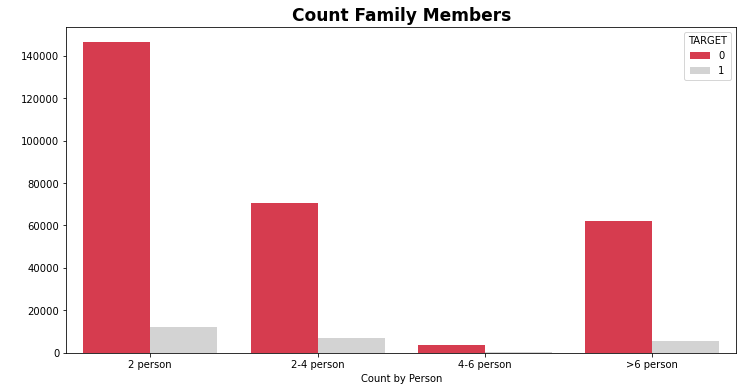

In [150]:
plt.figure(figsize=(12,6))
sns.countplot(data3['CNT_FAM_MEMBERS_FC'], hue=data3['TARGET'], order=['2 person','2-4 person','4-6 person','>6 person'], palette=pal)
plt.xlabel('Count by Person')
plt.ylabel(' ')
plt.title('Count Family Members', fontsize=17, weight='bold')

#plt.savefig('figure11.png', dpi=500, bbox_inches='tight', pad_inches=0.2, transparent=True)

In [143]:
abc = data3.groupby(['CNT_FAM_MEMBERS_FC','TARGET']).agg(COUNT=('TARGET','count'))
abc['PERCENT'] = round(abc['COUNT']/data3.groupby('CNT_FAM_MEMBERS_FC')['TARGET'].count()*100,2)
abc = abc.reset_index()
abc

,CNT_FAM_MEMBERS_FC,TARGET,COUNT,PERCENT
0,2 person,0,146350,92.42
1,2 person,1,12009,7.58
2,2-4 person,0,70554,91.28
3,2-4 person,1,6744,8.72
4,4-6 person,0,3504,90.17
5,4-6 person,1,382,9.83
6,>6 person,0,62278,91.63
7,>6 person,1,5690,8.37


## `AMT_GOODS_PRICE`

In [111]:
data3['AMT_GOODS_PRICE_FC'] = np.where(data2['AMT_GOODS_PRICE']<=300000,'<300k',
                              np.where((data2['AMT_GOODS_PRICE']>300000)&(data2['AMT_GOODS_PRICE']<=600000),'300k-600k',
                              np.where((data2['AMT_GOODS_PRICE']>600000)&(data2['AMT_GOODS_PRICE']<=900000),'600k-900k','>900k')))

data3['AMT_GOODS_PRICE_FC'].value_counts()

<300k        104426
300k-600k     91587
600k-900k     69618
>900k         41880
Name: AMT_GOODS_PRICE_FC, dtype: int64

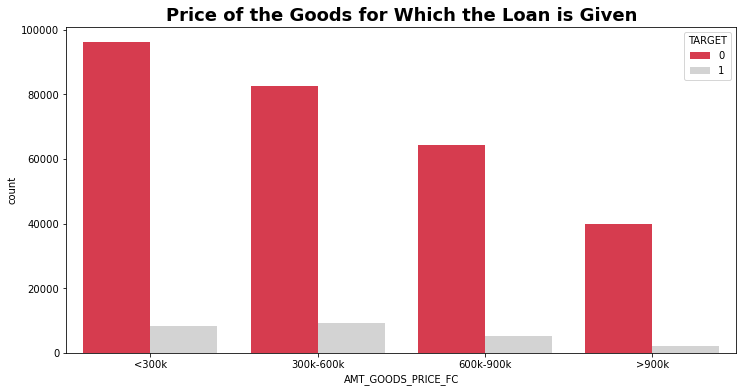

In [151]:
plt.figure(figsize=(12,6))
sns.countplot(data3['AMT_GOODS_PRICE_FC'], hue=data3['TARGET'], order=['<300k','300k-600k','600k-900k','>900k'], palette=pal)
plt.title('Price of the Goods for Which the Loan is Given', fontsize=18, weight='bold')
#plt.savefig('figure12.png', dpi=500, bbox_inches='tight', pad_inches=0.2, transparent=True)

In [142]:
abc = data3.groupby(['AMT_GOODS_PRICE_FC','TARGET']).agg(COUNT=('TARGET','count'))
abc['PERCENT'] = round(abc['COUNT']/data3.groupby('AMT_GOODS_PRICE_FC')['TARGET'].count()*100,2)
abc = abc.reset_index()
abc

,AMT_GOODS_PRICE_FC,TARGET,COUNT,PERCENT
0,300k-600k,0,82456,90.03
1,300k-600k,1,9131,9.97
2,600k-900k,0,64408,92.52
3,600k-900k,1,5210,7.48
4,<300k,0,96083,92.01
5,<300k,1,8343,7.99
6,>900k,0,39739,94.89
7,>900k,1,2141,5.11


## `CODE_GENDER` and `FLAG_OWN_CARS`

In [5]:
abc = pd.merge(app_train, bureau, left_on='SK_ID_CURR', right_on='SK_ID_CURR')
bca = pd.merge(abc, bureau_blc, left_on='SK_ID_BUREAU', right_on='SK_ID_BUREAU')

In [7]:
bca['CODE_GENDER'] = np.where(bca['CODE_GENDER']=='XNA','F',bca['CODE_GENDER'])
bca['CODE_GENDER'].value_counts()

F    9925437
M    4776175
Name: CODE_GENDER, dtype: int64

In [10]:
asd = bca[bca['FLAG_OWN_CAR']=='Y']

In [13]:
zxc = asd.groupby(['FLAG_OWN_CAR','CODE_GENDER'])['TARGET'].sum().reset_index()
zxc['PERCENT'] = round(zxc['TARGET']/(139095+221958)*100,2)
zxc['VALUES'] = ['Female Owner Car', 'Male Owner Car']
zxc

,FLAG_OWN_CAR,CODE_GENDER,TARGET,PERCENT,VALUES
0,Y,F,139095,38.52,Female Owner Car
1,Y,M,221958,61.48,Male Owner Car


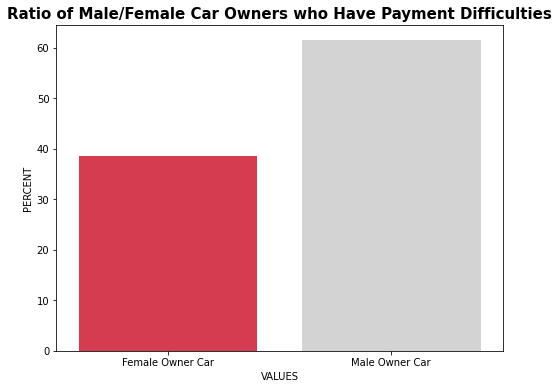

In [21]:
plt.figure(figsize=(8,6))
sns.barplot(x='VALUES', y='PERCENT', data=zxc, palette=pal)
plt.title('Ratio of Male/Female Car Owners who Have Payment Difficulties', fontsize=15, weight='bold')
#plt.savefig('figure13.png', dpi=500, bbox_inches='tight', pad_inches=0.2, transparent=True)

## Summary

- Gender and Car Ownership  are the top 3 important features, demographically male with care ownership have a higher probability to be clients with payment difficulties
- We suggest to target  female clients and/or male prospective clients with no car ownership and personalized campaign with demographic information related to other recommendation
- Client with no children and  have >4 children  are the top 6 important features
- Our recommendation in marketing department, focus on client with less children and aware with client that have either no children or too many children
- It's make sense when family with no burdency and with too many burdency to get payment difficulties
- Client with amount price for loans < 300k and >900k are top 10 feature importance
- Our recommendation in marketing department, between those range because it has lower probability to have payment difficulties
- Company should aware with too little amount goods price and/or with too high amount goods of price. 